In [1]:
#import infercnvpy as cnv
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scipy
sc.settings.verbosity = 3
sc.logging.print_header()
sc.set_figure_params(dpi=100, dpi_save=600)
    
import scvelo as scv
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.logging.print_versions()


import matplotlib.pyplot as pl
from matplotlib import rcParams

/home/kko1/.pyenv/versions/3.8.19/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.8 anndata==0.9.2 umap==0.5.6 numpy==1.24.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.11.8 pynndescent==0.5.13
scvelo==0.3.2  scanpy==1.9.8  anndata==0.9.2  loompy==3.0.7  numpy==1.24.4  scipy==1.10.1  matplotlib==3.7.5  sklearn==1.3.2  pandas==2.0.3  


In [2]:
import seaborn as sns

ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [3]:
import scvelo as scv

In [4]:
import os
os.chdir('/mnt/d/KP/EKP_RKP')

In [16]:
#EKP_scvelo
a1 = sc.read('scvelo_EKP_2nd_try_final_integrated.h5ad')
a1

AnnData object with n_obs × n_vars = 717 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'f

In [17]:
#RKP_scvelo
a3 = sc.read('scvelo_RKP_2nd_try_final_integrated.h5ad')
a3

AnnData object with n_obs × n_vars = 1115 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', '

In [18]:
ls = [a1, a3]

In [19]:
a1.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCACAGTATGAA     3835               3829       16049.0           1046.0   
AAACGAAAGTAGGGTC      338                338        1239.0              1.0   
AAACGAATCTCGCTTG      656                656        1903.0            570.0   
AAACGCTAGTGGCGAT     4898               4898       26809.0            977.0   
AAACGCTCATGGAATA     4000               4000       21023.0            548.0   
...                   ...                ...           ...              ...   
TTTAGTCTCAGGCGAA     4392               4389       27172.0            842.0   
TTTCACAAGAGTCTTC     4679               4672       38163.0            845.0   
TTTCATGCATCCGAAT      564                564        1562.0            155.0   
TTTGACTAGGTCGACA     3165               3164       15053.0            348.0   
TTTGGAGGTACAGTAA     5357               5355       46668.0           1655.0   

                  pct_counts_mt     tissue type leiden batch sample_batch  \
AAACCCACAGTATGAA       6.517540  allograft  EKP      0     0         -1-0   
AAACGAAAGTAGGGTC       0.080710  allograft  EKP      5     0         -1-0   
AAACGAATCTCGCTTG      29.952705  allograft  EKP      4     0         -1-0   
AAACGCTAGTGGCGAT       3.644298  allograft  EKP      1     0         -1-0   
AAACGCTCATGGAATA       2.606669  allograft  EKP      2     0         -1-0   
...                         ...        ...  ...    ...   ...          ...   
TTTAGTCTCAGGCGAA       3.098778  allograft  EKP      1     0         -1-0   
TTTCACAAGAGTCTTC       2.214186  allograft  EKP      0     0         -1-0   
TTTCATGCATCCGAAT       9.923176  allograft  EKP      3     0         -1-0   
TTTGACTAGGTCGACA       2.311831  allograft  EKP      0     0         -1-0   
TTTGGAGGTACAGTAA       3.546327  allograft  EKP      0     0         -1-0   

                  ...  initial_size      n_counts  velocity_self_transition  \
AAACCCACAGTATGAA  ...        7766.0   2352.801758                  0.035713   
AAACGAAAGTAGGGTC  ...        1022.0   5656.492676                  0.175031   
AAACGAATCTCGCTTG  ...         628.0  12684.929688                  0.010161   
AAACGCTAGTGGCGAT  ...       16866.0   1151.886353                  0.291017   
AAACGCTCATGGAATA  ...       12205.0   1565.709595                  0.228161   
...               ...           ...           ...                       ...   
TTTAGTCTCAGGCGAA  ...       15585.0   1225.140625                  0.067607   
TTTCACAAGAGTCTTC  ...       22535.0    805.898987                  0.054340   
TTTCATGCATCCGAAT  ...        1129.0   7678.042969                  0.153093   
TTTGACTAGGTCGACA  ...        7526.0   2413.536133                  0.079302   
TTTGGAGGTACAGTAA  ...       26797.0    713.024414                  0.086024   

                  root_cells  end_points  velocity_pseudotime  latent_time  \
AAACCCACAGTATGAA    0.162717    0.014386             0.336311     0.834071   
AAACGAAAGTAGGGTC    0.523211    0.037694             0.138676     0.193168   
AAACGAATCTCGCTTG    0.617901    0.394944             0.520379     0.135188   
AAACGCTAGTGGCGAT    0.086485    0.005984             0.340351     0.862483   
AAACGCTCATGGAATA    0.127363    0.000017             0.401556     0.949667   
...                      ...         ...                  ...          ...   
TTTAGTCTCAGGCGAA    0.149836    0.004430             0.340590     0.871745   
TTTCACAAGAGTCTTC    0.042901    0.003730             0.346953     0.856875   
TTTCATGCATCCGAAT    1.000000    0.076964             0.517613     0.199179   
TTTGACTAGGTCGACA    0.038981    0.003638             0.357056     0.812118   
TTTGGAGGTACAGTAA    0.034934    0.006473             0.348679     0.869456   

                  velocity_length  velocity_confidence  \
AAACCCACAGTATGAA           167.25             0.516420   
AAACGAAAGTAGGGTC            33.70             0.502832   
AAACGAATCTCGCTTG           290.87             0.099673   
AAACGCTAGTGGCGAT          

In [20]:
a1.obs['tissue']='EKP'
a3.obs['tissue']='RKP'

In [21]:
for a in ls:
    if a is not None:
        a.var_names_make_unique()
print('done')

done


In [22]:
raw = a1.concatenate(a3)                           
raw

AnnData object with n_obs × n_vars = 1832 × 513
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'Accession', 'End', 'Start', 'Strand', 'gene_count_corr', 'highly_variable', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'Chromosome-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'fit_r2-0', 'fit_alpha-0', 'fit_beta-0', 'fit_gamma-0', 'fit_t_-0', 'fit_scaling-0', 'fit_std_u-0', 'fit_std_s-0', 'fit_likelihood-0', 'fit_u0-0', 'fit_s0-0', 'fit_pval_steady-0', 'fit_steady_u-0', 'fit_steady_s-0', 'fit_variance-0', 'fit_alignment_scaling-0

# Check

In [23]:
processed = sc.read('Epi_after_harmony_more_genes_04-30-24.h5ad')
processed

AnnData object with n_obs × n_vars = 1832 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [24]:
print(processed.X.shape)

(1832, 20470)


In [25]:
#sc.tl.umap(processed)

In [26]:
raw.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCACAGTATGAA-0     3835               3829       16049.0           1046.0   
AAACGAAAGTAGGGTC-0      338                338        1239.0              1.0   
AAACGAATCTCGCTTG-0      656                656        1903.0            570.0   
AAACGCTAGTGGCGAT-0     4898               4898       26809.0            977.0   
AAACGCTCATGGAATA-0     4000               4000       21023.0            548.0   
...                     ...                ...           ...              ...   
TTTGATCCATGACTTG-1      694                694        1473.0              2.0   
TTTGGAGGTCTCGCGA-1     1346               1344        4410.0             80.0   
TTTGGAGTCATGGTAC-1      294                294         625.0              7.0   
TTTGTTGCAACAGCCC-1      236                236         940.0            617.0   
TTTGTTGCAGGATTCT-1      406                406        1057.0              2.0   

                    pct_counts_mt tissue type leiden batch sample_batch  ...  \
AAACCCACAGTATGAA-0       6.517540    EKP  EKP      0     0         -1-0  ...   
AAACGAAAGTAGGGTC-0       0.080710    EKP  EKP      5     0         -1-0  ...   
AAACGAATCTCGCTTG-0      29.952705    EKP  EKP      4     0         -1-0  ...   
AAACGCTAGTGGCGAT-0       3.644298    EKP  EKP      1     0         -1-0  ...   
AAACGCTCATGGAATA-0       2.606669    EKP  EKP      2     0         -1-0  ...   
...                           ...    ...  ...    ...   ...          ...  ...   
TTTGATCCATGACTTG-1       0.135777    RKP  RKP      3     1         -1-1  ...   
TTTGGAGGTCTCGCGA-1       1.814059    RKP  RKP      3     1         -1-1  ...   
TTTGGAGTCATGGTAC-1       1.120000    RKP  RKP      1     1         -1-1  ...   
TTTGTTGCAACAGCCC-1      65.638298    RKP  RKP      7     1         -1-1  ...   
TTTGTTGCAGGATTCT-1       0.189215    RKP  RKP      4     1         -1-1  ...   

                    initial_size      n_counts  velocity_self_transition  \
AAACCCACAGTATGAA-0        7766.0   2352.801758                  0.035713   
AAACGAAAGTAGGGTC-0        1022.0   5656.492676                  0.175031   
AAACGAATCTCGCTTG-0         628.0  12684.929688                  0.010161   
AAACGCTAGTGGCGAT-0       16866.0   1151.886353                  0.291017   
AAACGCTCATGGAATA-0       12205.0   1565.709595                  0.228161   
...                          ...           ...                       ...   
TTTGATCCATGACTTG-1        1078.0   2920.052246                  0.650252   
TTTGGAGGTCTCGCGA-1        3126.0   1236.651245                  0.569004   
TTTGGAGTCATGGTAC-1         489.0   3808.854492                  0.683313   
TTTGTTGCAACAGCCC-1         281.0   4052.198975                  0.213537   
TTTGTTGCAGGATTCT-1         333.0   5745.839355                  0.036854   

                    root_cells    end_points  velocity_pseudotime  \
AAACCCACAGTATGAA-0    0.162717  1.438578e-02             0.336311   
AAACGAAAGTAGGGTC-0    0.523211  3.769389e-02             0.138676   
AAACGAATCTCGCTTG-0    0.617901  3.949440e-01             0.520379   
AAACGCTAGTGGCGAT-0    0.086485  5.984261e-03             0.340351   
AAACGCTCATGGAATA-0    0.127363  1.728421e-05             0.401556   
...                        ...           ...                  ...   
TTTGATCCATGACTTG-1    0.001063  1.225281e-07             0.644648   
TTTGGAGGTCTCGCGA-1    0.002786  6.233914e-08             0.657289   
TTTGGAGTCATGGTAC-1    1.000000  3.093939e-07             0.064256   
TTTGTTGCAACAGCCC-1    0.001865  3.037872e-04             0.792318   
TTTGTTGCAGGATTCT-1    0.004092  6.903732e-02             0.815803   

                    latent_time  velocity_length  velocity_confidence  \
AAACCCACAGTATGAA-0     0.834071           167.25             0.516420   
AAACGAAAGTAGGGTC-0     0.193168            33.70             0.502832   
AAACGAATCTCGCTTG-0     0.135188           290.87             0.099673   
AAACGCTAGTGGCGAT-0     0.862483           109.88    

In [27]:
processed.obs

batch sample_batch     tissue type leiden  n_genes  \
AAACCCACAGTATGAA     0         -1-0  allograft  EKP      0     3835   
AAACGAAAGTAGGGTC     0         -1-0  allograft  EKP      2      338   
AAACGAATCTCGCTTG     0         -1-0  allograft  EKP      2      656   
AAACGCTAGTGGCGAT     0         -1-0  allograft  EKP      0     4898   
AAACGCTCATGGAATA     0         -1-0  allograft  EKP      0     4000   
...                ...          ...        ...  ...    ...      ...   
TTTGATCCATGACTTG     1         -1-1  allograft  RKP      2      694   
TTTGGAGGTCTCGCGA     1         -1-1  allograft  RKP      2     1346   
TTTGGAGTCATGGTAC     1         -1-1  allograft  RKP      2      294   
TTTGTTGCAACAGCCC     1         -1-1  allograft  RKP      1      236   
TTTGTTGCAGGATTCT     1         -1-1  allograft  RKP      1      406   

                  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCACAGTATGAA               3835       16059.0           1046.0   
AAACGAAAGTAGGGTC                338        1239.0              1.0   
AAACGAATCTCGCTTG                656        1903.0            570.0   
AAACGCTAGTGGCGAT               4898       26809.0            977.0   
AAACGCTCATGGAATA               4000       21023.0            548.0   
...                             ...           ...              ...   
TTTGATCCATGACTTG                694        1473.0              2.0   
TTTGGAGGTCTCGCGA               1346        4412.0             80.0   
TTTGGAGTCATGGTAC                294         625.0              7.0   
TTTGTTGCAACAGCCC                236         940.0            617.0   
TTTGTTGCAGGATTCT                406        1057.0              2.0   

                  pct_counts_mt  total_counts_rpl  pct_counts_rpl  \
AAACCCACAGTATGAA       6.513482               0.0             0.0   
AAACGAAAGTAGGGTC       0.080710               0.0             0.0   
AAACGAATCTCGCTTG      29.952705               0.0             0.0   
AAACGCTAGTGGCGAT       3.644298               0.0             0.0   
AAACGCTCATGGAATA       2.606669               0.0             0.0   
...                         ...               ...             ...   
TTTGATCCATGACTTG       0.135777               0.0             0.0   
TTTGGAGGTCTCGCGA       1.813237               0.0             0.0   
TTTGGAGTCATGGTAC       1.120000               0.0             0.0   
TTTGTTGCAACAGCCC      65.638298               0.0             0.0   
TTTGTTGCAGGATTCT       0.189215               0.0             0.0   

                  total_counts_rps  pct_counts_rps  
AAACCCACAGTATGAA               0.0             0.0  
AAACGAAAGTAGGGTC               0.0             0.0  
AAACGAATCTCGCTTG               0.0             0.0  
AAACGCTAGTGGCGAT               0.0             0.0  
AAACGCTCATGGAATA               0.0             0.0  
...                            ...             ...  
TTTGATCCATGACTTG               0.0             0.0  
TTTGGAGGTCTCGCGA               0.0             0.0  
TTTGGAGTCATGGTAC               0.0             0.0  
TTTGTTGCAACAGCCC               0.0             0.0  
TTTGTTGCAGGATTCT               0.0             0.0  

[1832 rows x 14 columns]

In [30]:
scv.utils.clean_obs_names(raw)
scv.utils.clean_obs_names(processed)

In [31]:
raw.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCACAGTATGAA     3835               3829       16049.0           1046.0   
AAACGAAAGTAGGGTC      338                338        1239.0              1.0   
AAACGAATCTCGCTTG      656                656        1903.0            570.0   
AAACGCTAGTGGCGAT     4898               4898       26809.0            977.0   
AAACGCTCATGGAATA     4000               4000       21023.0            548.0   
...                   ...                ...           ...              ...   
TTTGATCCATGACTTG      694                694        1473.0              2.0   
TTTGGAGGTCTCGCGA     1346               1344        4410.0             80.0   
TTTGGAGTCATGGTAC      294                294         625.0              7.0   
TTTGTTGCAACAGCCC      236                236         940.0            617.0   
TTTGTTGCAGGATTCT      406                406        1057.0              2.0   

                  pct_counts_mt tissue type leiden batch sample_batch  ...  \
AAACCCACAGTATGAA       6.517540    EKP  EKP      0     0           -0  ...   
AAACGAAAGTAGGGTC       0.080710    EKP  EKP      5     0           -0  ...   
AAACGAATCTCGCTTG      29.952705    EKP  EKP      4     0           -0  ...   
AAACGCTAGTGGCGAT       3.644298    EKP  EKP      1     0           -0  ...   
AAACGCTCATGGAATA       2.606669    EKP  EKP      2     0           -0  ...   
...                         ...    ...  ...    ...   ...          ...  ...   
TTTGATCCATGACTTG       0.135777    RKP  RKP      3     1           -1  ...   
TTTGGAGGTCTCGCGA       1.814059    RKP  RKP      3     1           -1  ...   
TTTGGAGTCATGGTAC       1.120000    RKP  RKP      1     1           -1  ...   
TTTGTTGCAACAGCCC      65.638298    RKP  RKP      7     1           -1  ...   
TTTGTTGCAGGATTCT       0.189215    RKP  RKP      4     1           -1  ...   

                  initial_size      n_counts  velocity_self_transition  \
AAACCCACAGTATGAA        7766.0   2352.801758                  0.035713   
AAACGAAAGTAGGGTC        1022.0   5656.492676                  0.175031   
AAACGAATCTCGCTTG         628.0  12684.929688                  0.010161   
AAACGCTAGTGGCGAT       16866.0   1151.886353                  0.291017   
AAACGCTCATGGAATA       12205.0   1565.709595                  0.228161   
...                        ...           ...                       ...   
TTTGATCCATGACTTG        1078.0   2920.052246                  0.650252   
TTTGGAGGTCTCGCGA        3126.0   1236.651245                  0.569004   
TTTGGAGTCATGGTAC         489.0   3808.854492                  0.683313   
TTTGTTGCAACAGCCC         281.0   4052.198975                  0.213537   
TTTGTTGCAGGATTCT         333.0   5745.839355                  0.036854   

                  root_cells    end_points  velocity_pseudotime  latent_time  \
AAACCCACAGTATGAA    0.162717  1.438578e-02             0.336311     0.834071   
AAACGAAAGTAGGGTC    0.523211  3.769389e-02             0.138676     0.193168   
AAACGAATCTCGCTTG    0.617901  3.949440e-01             0.520379     0.135188   
AAACGCTAGTGGCGAT    0.086485  5.984261e-03             0.340351     0.862483   
AAACGCTCATGGAATA    0.127363  1.728421e-05             0.401556     0.949667   
...                      ...           ...                  ...          ...   
TTTGATCCATGACTTG    0.001063  1.225281e-07             0.644648     0.607413   
TTTGGAGGTCTCGCGA    0.002786  6.233914e-08             0.657289     0.631854   
TTTGGAGTCATGGTAC    1.000000  3.093939e-07             0.064256     0.026485   
TTTGTTGCAACAGCCC    0.001865  3.037872e-04             0.792318     0.861688   
TTTGTTGCAGGATTCT    0.004092  6.903732e-02             0.815803     0.919478   

                  velocity_length  velocity_confidence  \
AAACCCACAGTATGAA           167.25             0.516420   
AAACGAAAGTAGGGTC            33.70             0.502832   
AAACGAATCTCGCTTG           290.87             0.099673   
AAACGCTAGTGGCGAT           109.88             0.62

In [32]:
processed.obs

batch sample_batch     tissue type leiden  n_genes  \
AAACCCACAGTATGAA     0         -1-0  allograft  EKP      0     3835   
AAACGAAAGTAGGGTC     0         -1-0  allograft  EKP      2      338   
AAACGAATCTCGCTTG     0         -1-0  allograft  EKP      2      656   
AAACGCTAGTGGCGAT     0         -1-0  allograft  EKP      0     4898   
AAACGCTCATGGAATA     0         -1-0  allograft  EKP      0     4000   
...                ...          ...        ...  ...    ...      ...   
TTTGATCCATGACTTG     1         -1-1  allograft  RKP      2      694   
TTTGGAGGTCTCGCGA     1         -1-1  allograft  RKP      2     1346   
TTTGGAGTCATGGTAC     1         -1-1  allograft  RKP      2      294   
TTTGTTGCAACAGCCC     1         -1-1  allograft  RKP      1      236   
TTTGTTGCAGGATTCT     1         -1-1  allograft  RKP      1      406   

                  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCACAGTATGAA               3835       16059.0           1046.0   
AAACGAAAGTAGGGTC                338        1239.0              1.0   
AAACGAATCTCGCTTG                656        1903.0            570.0   
AAACGCTAGTGGCGAT               4898       26809.0            977.0   
AAACGCTCATGGAATA               4000       21023.0            548.0   
...                             ...           ...              ...   
TTTGATCCATGACTTG                694        1473.0              2.0   
TTTGGAGGTCTCGCGA               1346        4412.0             80.0   
TTTGGAGTCATGGTAC                294         625.0              7.0   
TTTGTTGCAACAGCCC                236         940.0            617.0   
TTTGTTGCAGGATTCT                406        1057.0              2.0   

                  pct_counts_mt  total_counts_rpl  pct_counts_rpl  \
AAACCCACAGTATGAA       6.513482               0.0             0.0   
AAACGAAAGTAGGGTC       0.080710               0.0             0.0   
AAACGAATCTCGCTTG      29.952705               0.0             0.0   
AAACGCTAGTGGCGAT       3.644298               0.0             0.0   
AAACGCTCATGGAATA       2.606669               0.0             0.0   
...                         ...               ...             ...   
TTTGATCCATGACTTG       0.135777               0.0             0.0   
TTTGGAGGTCTCGCGA       1.813237               0.0             0.0   
TTTGGAGTCATGGTAC       1.120000               0.0             0.0   
TTTGTTGCAACAGCCC      65.638298               0.0             0.0   
TTTGTTGCAGGATTCT       0.189215               0.0             0.0   

                  total_counts_rps  pct_counts_rps  
AAACCCACAGTATGAA               0.0             0.0  
AAACGAAAGTAGGGTC               0.0             0.0  
AAACGAATCTCGCTTG               0.0             0.0  
AAACGCTAGTGGCGAT               0.0             0.0  
AAACGCTCATGGAATA               0.0             0.0  
...                            ...             ...  
TTTGATCCATGACTTG               0.0             0.0  
TTTGGAGGTCTCGCGA               0.0             0.0  
TTTGGAGTCATGGTAC               0.0             0.0  
TTTGTTGCAACAGCCC               0.0             0.0  
TTTGTTGCAGGATTCT               0.0             0.0  

[1832 rows x 14 columns]

In [33]:
raw_1= scv.utils.merge(processed, raw)
raw_1

AnnData object with n_obs × n_vars = 1832 × 513
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std', 'gene_ids_2', 'feature_types_2', 'mt_2', 'Accession', 'End', 'Start', 'Strand', 'gene_count_corr', 'highly_variable', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'Chromosome-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'fit_r2-0', 'fit_alpha-0', 'fi

In [34]:
df= pd.crosstab(processed.obs['tissue'], processed.obs['type'])
df

type       EKP   RKP
tissue              
allograft  717  1115

In [35]:
raw_1.obs

batch sample_batch     tissue type leiden  n_genes  \
AAACCCACAGTATGAA     0         -1-0  allograft  EKP      0     3835   
AAACGAAAGTAGGGTC     0         -1-0  allograft  EKP      2      338   
AAACGAATCTCGCTTG     0         -1-0  allograft  EKP      2      656   
AAACGCTAGTGGCGAT     0         -1-0  allograft  EKP      0     4898   
AAACGCTCATGGAATA     0         -1-0  allograft  EKP      0     4000   
...                ...          ...        ...  ...    ...      ...   
TTTGATCCATGACTTG     1         -1-1  allograft  RKP      2      694   
TTTGGAGGTCTCGCGA     1         -1-1  allograft  RKP      2     1346   
TTTGGAGTCATGGTAC     1         -1-1  allograft  RKP      2      294   
TTTGTTGCAACAGCCC     1         -1-1  allograft  RKP      1      236   
TTTGTTGCAGGATTCT     1         -1-1  allograft  RKP      1      406   

                  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCACAGTATGAA               3835       16059.0           1046.0   
AAACGAAAGTAGGGTC                338        1239.0              1.0   
AAACGAATCTCGCTTG                656        1903.0            570.0   
AAACGCTAGTGGCGAT               4898       26809.0            977.0   
AAACGCTCATGGAATA               4000       21023.0            548.0   
...                             ...           ...              ...   
TTTGATCCATGACTTG                694        1473.0              2.0   
TTTGGAGGTCTCGCGA               1346        4412.0             80.0   
TTTGGAGTCATGGTAC                294         625.0              7.0   
TTTGTTGCAACAGCCC                236         940.0            617.0   
TTTGTTGCAGGATTCT                406        1057.0              2.0   

                  pct_counts_mt  ...  initial_size      n_counts  \
AAACCCACAGTATGAA       6.513482  ...        7766.0   2352.801758   
AAACGAAAGTAGGGTC       0.080710  ...        1022.0   5656.492676   
AAACGAATCTCGCTTG      29.952705  ...         628.0  12684.929688   
AAACGCTAGTGGCGAT       3.644298  ...       16866.0   1151.886353   
AAACGCTCATGGAATA       2.606669  ...       12205.0   1565.709595   
...                         ...  ...           ...           ...   
TTTGATCCATGACTTG       0.135777  ...        1078.0   2920.052246   
TTTGGAGGTCTCGCGA       1.813237  ...        3126.0   1236.651245   
TTTGGAGTCATGGTAC       1.120000  ...         489.0   3808.854492   
TTTGTTGCAACAGCCC      65.638298  ...         281.0   4052.198975   
TTTGTTGCAGGATTCT       0.189215  ...         333.0   5745.839355   

                  velocity_self_transition  root_cells    end_points  \
AAACCCACAGTATGAA                  0.035713    0.162717  1.438578e-02   
AAACGAAAGTAGGGTC                  0.175031    0.523211  3.769389e-02   
AAACGAATCTCGCTTG                  0.010161    0.617901  3.949440e-01   
AAACGCTAGTGGCGAT                  0.291017    0.086485  5.984261e-03   
AAACGCTCATGGAATA                  0.228161    0.127363  1.728421e-05   
...                                    ...         ...           ...   
TTTGATCCATGACTTG                  0.650252    0.001063  1.225281e-07   
TTTGGAGGTCTCGCGA                  0.569004    0.002786  6.233914e-08   
TTTGGAGTCATGGTAC                  0.683313    1.000000  3.093939e-07   
TTTGTTGCAACAGCCC                  0.213537    0.001865  3.037872e-04   
TTTGTTGCAGGATTCT                  0.036854    0.004092  6.903732e-02   

                  velocity_pseudotime  latent_time  velocity_length  \
AAACCCACAGTATGAA             0.336311     0.834071           167.25   
AAACGAAAGTAGGGTC             0.138676     0.193168            33.70   
AAACGAATCTCGCTTG             0.520379     0.135188           290.87   
AAACGCTAGTGGCGAT             0.340351     0.862483           109.88   
AAACGCTCATGGAATA             0.401556     0.949667           100.40   
...                               ...          ...              ...   
TTTGATCCATGACTTG             0.644648     0.607413            14.36   
TTTGGAGGTCTCGCGA             0.657289     0.631854            19.05   
TT

In [36]:
raw.obs['type']

AAACCCACAGTATGAA    EKP
AAACGAAAGTAGGGTC    EKP
AAACGAATCTCGCTTG    EKP
AAACGCTAGTGGCGAT    EKP
AAACGCTCATGGAATA    EKP
                   ... 
TTTGATCCATGACTTG    RKP
TTTGGAGGTCTCGCGA    RKP
TTTGGAGTCATGGTAC    RKP
TTTGTTGCAACAGCCC    RKP
TTTGTTGCAGGATTCT    RKP
Name: type, Length: 1832, dtype: category
Categories (2, object): ['EKP', 'RKP']

In [37]:
raw_1.obs['type']

AAACCCACAGTATGAA    EKP
AAACGAAAGTAGGGTC    EKP
AAACGAATCTCGCTTG    EKP
AAACGCTAGTGGCGAT    EKP
AAACGCTCATGGAATA    EKP
                   ... 
TTTGATCCATGACTTG    RKP
TTTGGAGGTCTCGCGA    RKP
TTTGGAGTCATGGTAC    RKP
TTTGTTGCAACAGCCC    RKP
TTTGTTGCAGGATTCT    RKP
Name: type, Length: 1832, dtype: category
Categories (2, object): ['EKP', 'RKP']

In [38]:
adata = processed
adata

AnnData object with n_obs × n_vars = 1832 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [39]:
raw_1

AnnData object with n_obs × n_vars = 1832 × 513
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std', 'gene_ids_2', 'feature_types_2', 'mt_2', 'Accession', 'End', 'Start', 'Strand', 'gene_count_corr', 'highly_variable', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'Chromosome-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'fit_r2-0', 'fit_alpha-0', 'fi

In [40]:
adata.obs['leiden'] = raw_1.obs['leiden']
adata.obs['initial_size_spliced'] = raw_1.obs['initial_size_spliced']
adata.obs['initial_size_unspliced'] = raw_1.obs['initial_size_unspliced']
adata.obs['initial_size'] = raw_1.obs['initial_size']
adata.obs['n_counts'] = raw_1.obs['n_counts']
adata.obs['velocity_self_transition'] = raw_1.obs['velocity_self_transition']
adata.obs['root_cells'] = raw_1.obs['root_cells']
adata.obs['end_points'] = raw_1.obs['end_points']
adata.obs['velocity_pseudotime'] = raw_1.obs['velocity_pseudotime']
adata.obs['latent_time'] = raw_1.obs['latent_time']
adata.obs['velocity_length'] = raw_1.obs['velocity_length']
adata.obs['velocity_confidence'] = raw_1.obs['velocity_confidence']
adata.obs['velocity_confidence_transition'] = raw_1.obs['velocity_confidence_transition']


adata.obsm['velocity_umap']=raw_1.obsm['velocity_umap']
adata.obsm['velocity_umap']=raw_1.obsm['velocity_umap']

#adata.layers['Ms'] = raw_1.layers['Ms']
#adata.layers['Mu'] = raw_1.layers['Mu']
#adata.layers['velocity'] = raw_1.layers['velocity']
#adata.layers['velocity_u'] = raw_1.layers['velocity_u']

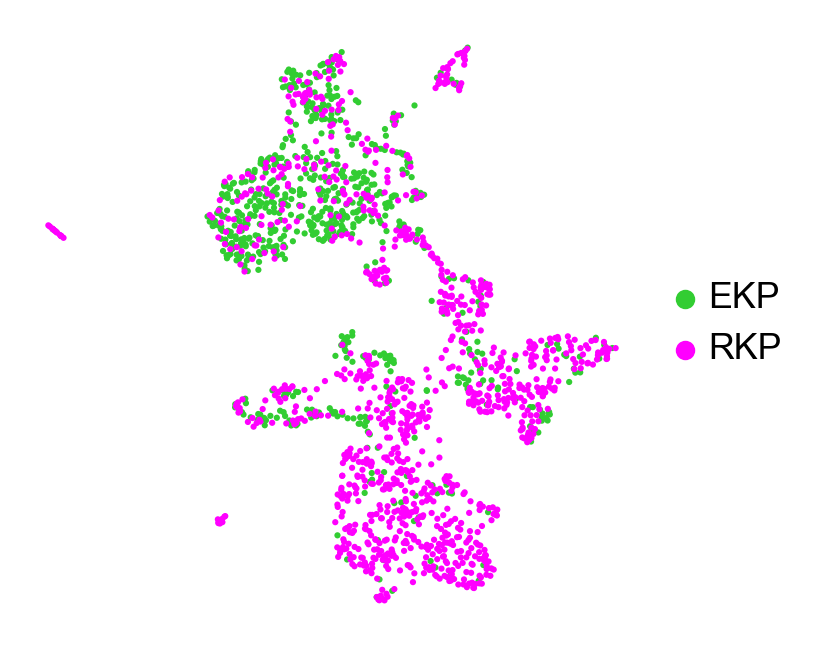

In [41]:
sc.pl.umap(adata, color=['type'] , legend_loc='right margin', frameon=False, title='', use_raw=False, size=20, palette={'EKP': 'limegreen','RKP': 'magenta'}
          )


In [42]:
df = pd.crosstab(adata.obs['type'],adata.obs['type'])
df

type  EKP   RKP
type           
EKP   717     0
RKP     0  1115

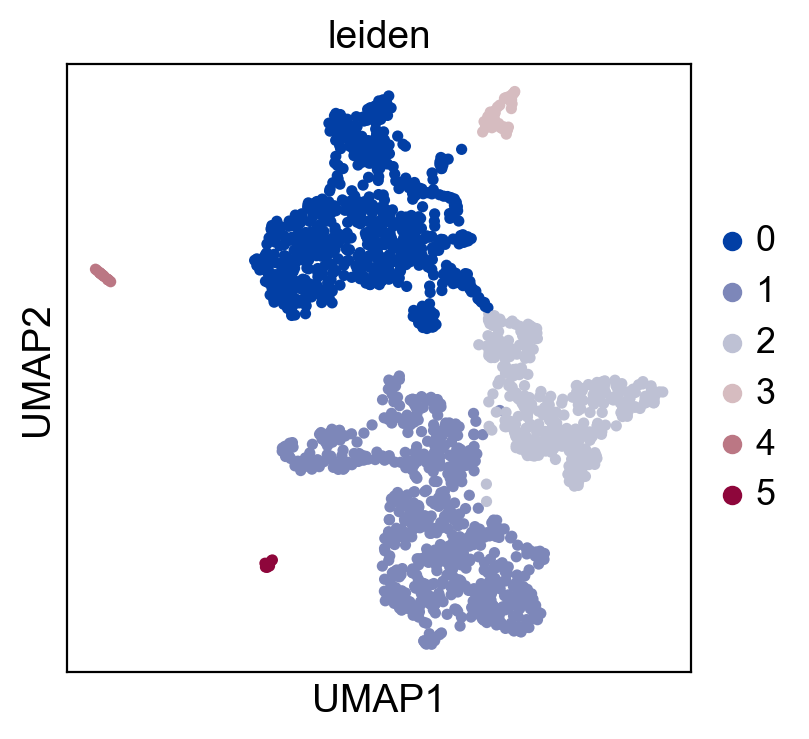

In [43]:
sc.pl.umap(adata, color=['leiden'])

In [ ]:
# Overlaying scvelo info

In [49]:
adata_ekp = sc.read('processed_with_scvelo_info_EKP.h5ad')
adata_ekp

AnnData object with n_obs × n_vars = 717 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'scvelo_leiden', 'velocity_length', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scvelo_umap', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scvelo_umap', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [50]:
adata_rkp = sc.read('processed_with_scvelo_info_RKP.h5ad')
adata_rkp

AnnData object with n_obs × n_vars = 1115 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'scvelo_leiden', 'velocity_length', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scvelo_leiden_colors', 'scvelo_umap', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scvelo_umap', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [51]:
adata_ekprkp = adata_ekp.concatenate(adata_rkp)                           
adata_ekprkp

AnnData object with n_obs × n_vars = 1832 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'scvelo_leiden', 'velocity_length', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scvelo_umap', 'X_umap', 'velocity_umap'

In [52]:
adata_ekprkp.obs['celltype']

AAACCCACAGTATGAA-0      Zeb2/Arg1+ (EKP)
AAACGAAAGTAGGGTC-0                 Cd63+
AAACGAATCTCGCTTG-0                 Cdk8+
AAACGCTAGTGGCGAT-0    Runx2/Runx3+ (EKP)
AAACGCTCATGGAATA-0          Runx1+ (EKP)
                             ...        
TTTGATCCATGACTTG-1                 Eno1+
TTTGGAGGTCTCGCGA-1                 Eno1+
TTTGGAGTCATGGTAC-1            Hdc/Cd24a+
TTTGTTGCAACAGCCC-1                 Cdk8+
TTTGTTGCAGGATTCT-1     Krt8/Krt18+ (RKP)
Name: celltype, Length: 1832, dtype: category
Categories (18, object): ['Aqp5+', 'Aqp5/Krt8+', 'Aqp9+', 'Cd63+', ..., 'Runx2/Runx3+ (RKP_2)', 'Tgfbr1/Celf2+ prolif', 'Zeb2/Arg1+ (EKP)', 'Zeb2/Arg1+ (RKP)']

In [53]:
scv.utils.clean_obs_names(adata_ekprkp)

In [54]:
adata_ekprkp.obs['celltype']

AAACCCACAGTATGAA      Zeb2/Arg1+ (EKP)
AAACGAAAGTAGGGTC                 Cd63+
AAACGAATCTCGCTTG                 Cdk8+
AAACGCTAGTGGCGAT    Runx2/Runx3+ (EKP)
AAACGCTCATGGAATA          Runx1+ (EKP)
                           ...        
TTTGATCCATGACTTG                 Eno1+
TTTGGAGGTCTCGCGA                 Eno1+
TTTGGAGTCATGGTAC            Hdc/Cd24a+
TTTGTTGCAACAGCCC                 Cdk8+
TTTGTTGCAGGATTCT     Krt8/Krt18+ (RKP)
Name: celltype, Length: 1832, dtype: category
Categories (18, object): ['Aqp5+', 'Aqp5/Krt8+', 'Aqp9+', 'Cd63+', ..., 'Runx2/Runx3+ (RKP_2)', 'Tgfbr1/Celf2+ prolif', 'Zeb2/Arg1+ (EKP)', 'Zeb2/Arg1+ (RKP)']

In [55]:
adata_ekprkp

AnnData object with n_obs × n_vars = 1832 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'scvelo_leiden', 'velocity_length', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scvelo_umap', 'X_umap', 'velocity_umap'

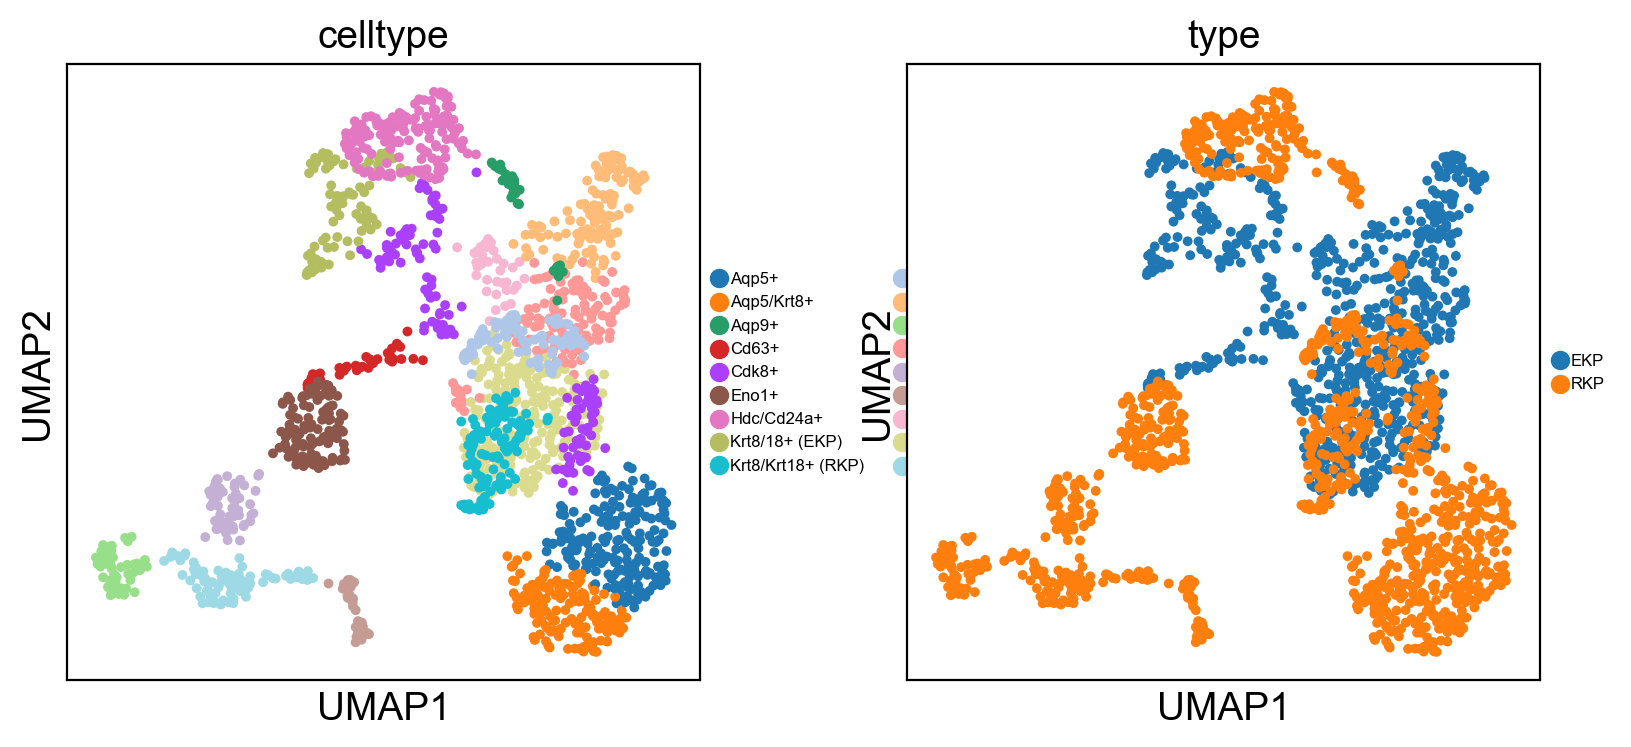

In [56]:
sc.pl.umap(adata_ekprkp, color=['celltype','type'], legend_loc='right margin', size=50, legend_fontsize=6)#, save='_Immune_cells_by_celltype.pdf')

In [57]:
adata.obs['scvelo_leiden'] = adata_ekprkp.obs['scvelo_leiden']
adata.obs['celltype'] = adata_ekprkp.obs['celltype']

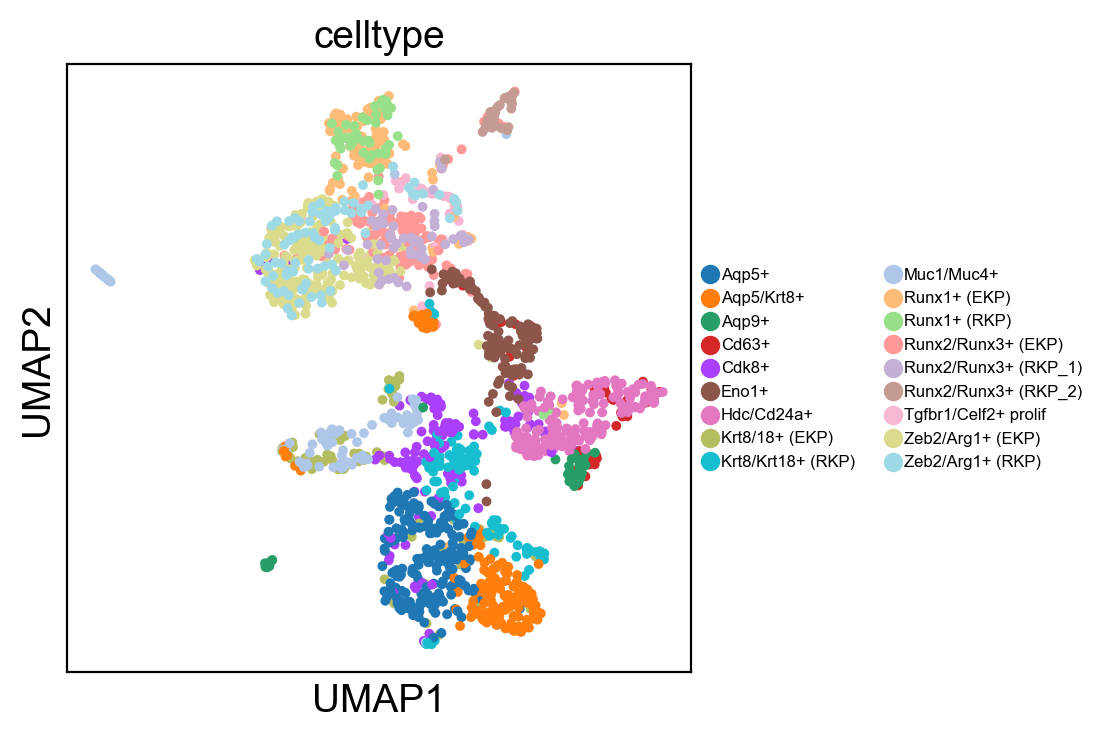

In [58]:
sc.pl.umap(adata, color=['celltype'], legend_loc='right margin', size=50, legend_fontsize=6, save='_EKP_and_RKP_by_celltype.pdf')

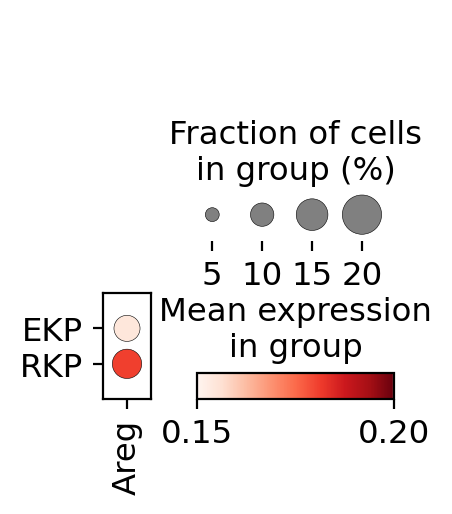

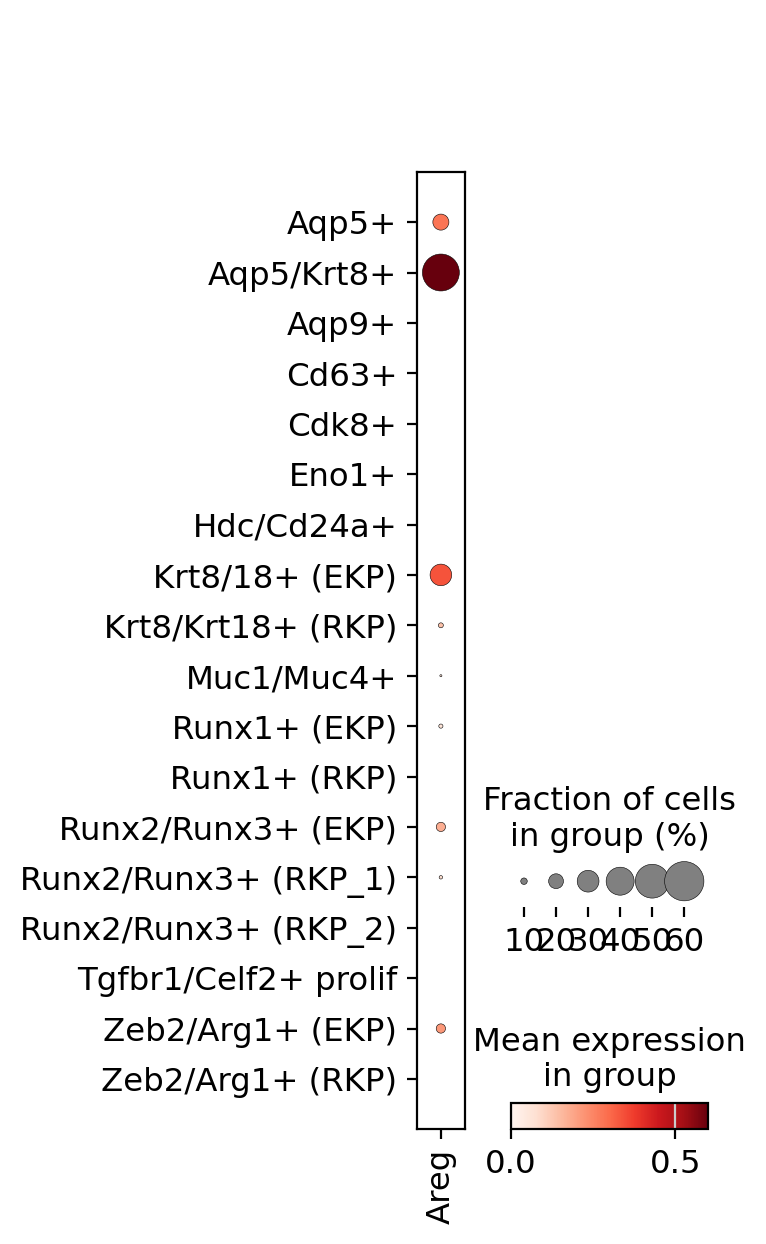

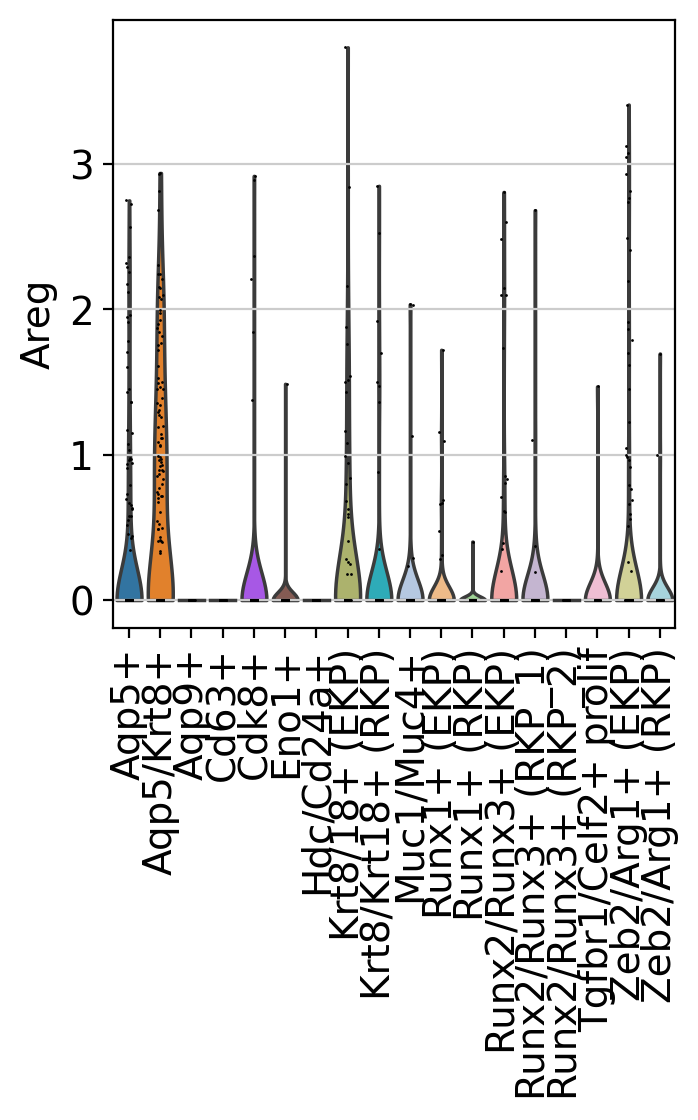

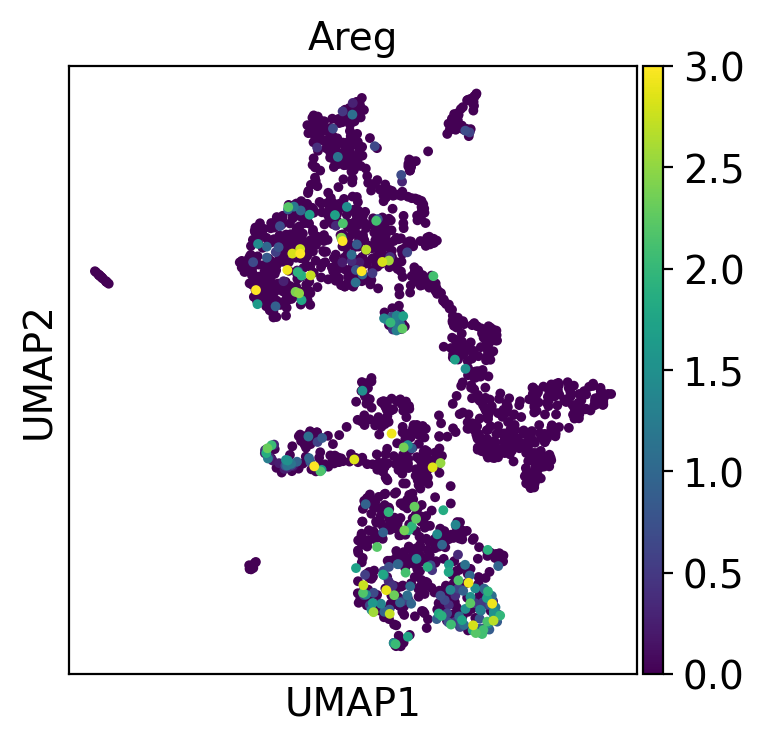

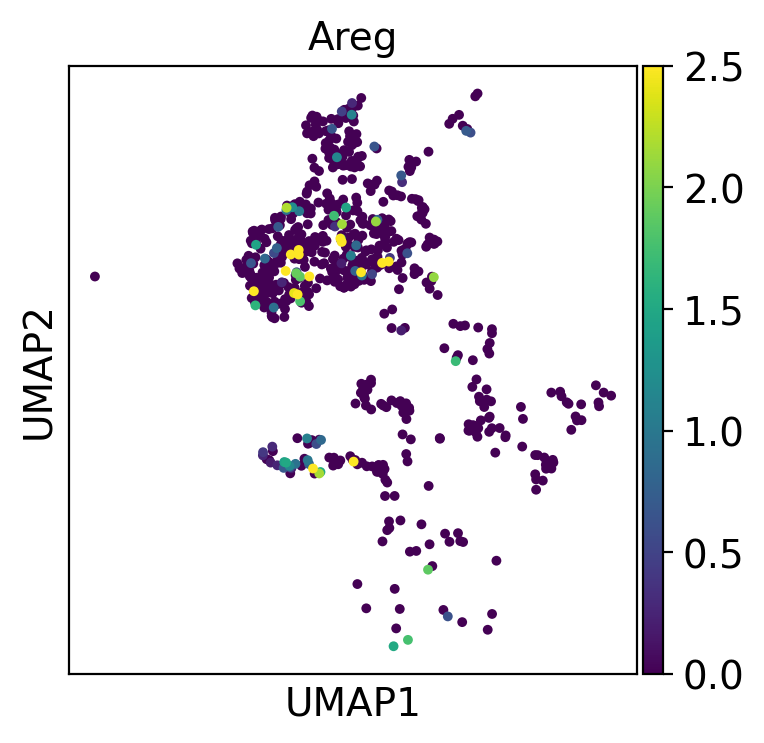

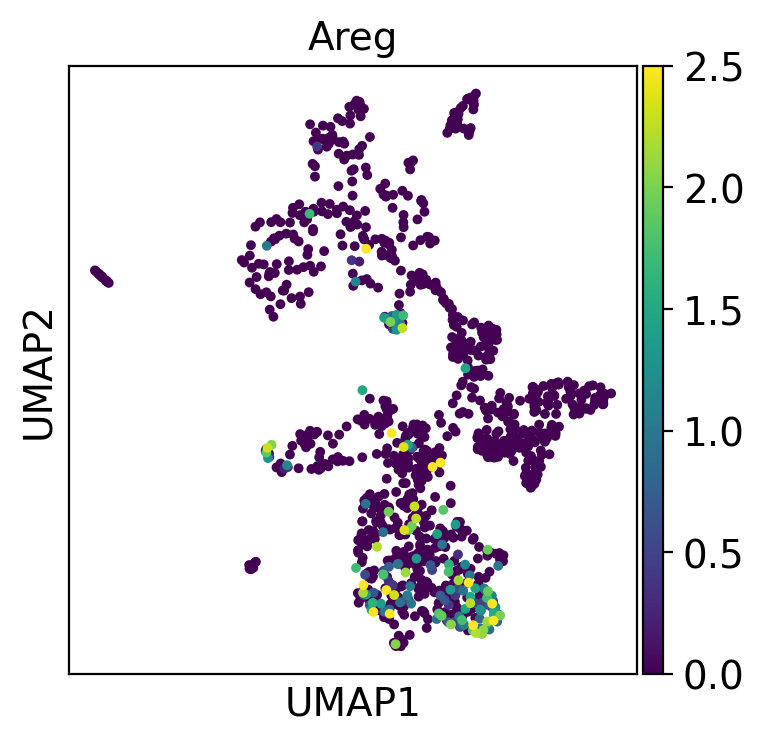

In [150]:
sc.pl.dotplot(adata, ['Areg'], groupby='type',vmin=0.15, vmax=0.2, save='_Areg_by_type.pdf')
sc.pl.dotplot(adata, ['Areg'], groupby='celltype', dot_min=0.05, dot_max=0.6, vmax=0.6, save='_Areg_by_celltype.pdf')
sc.pl.violin(adata, ['Areg'], groupby='celltype', rotation=90, save='_Areg_by_celltype')
sc.pl.umap(adata, color=['Areg'], vmin=0, vmax=3, size=50)
sc.pl.umap(adata[adata.obs['type']=='EKP'], color=['Areg'], vmin=0, vmax=2.5, size=50)
sc.pl.umap(adata[adata.obs['type']=='RKP'], color=['Areg'], vmin=0, vmax=2.5, size=50)

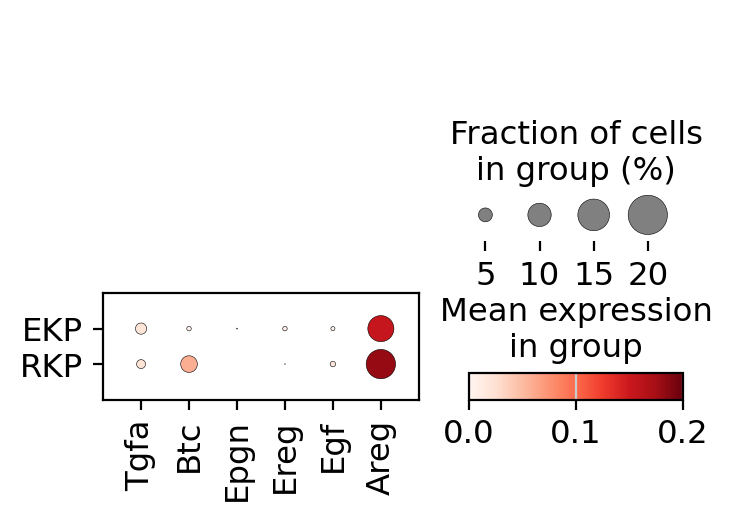

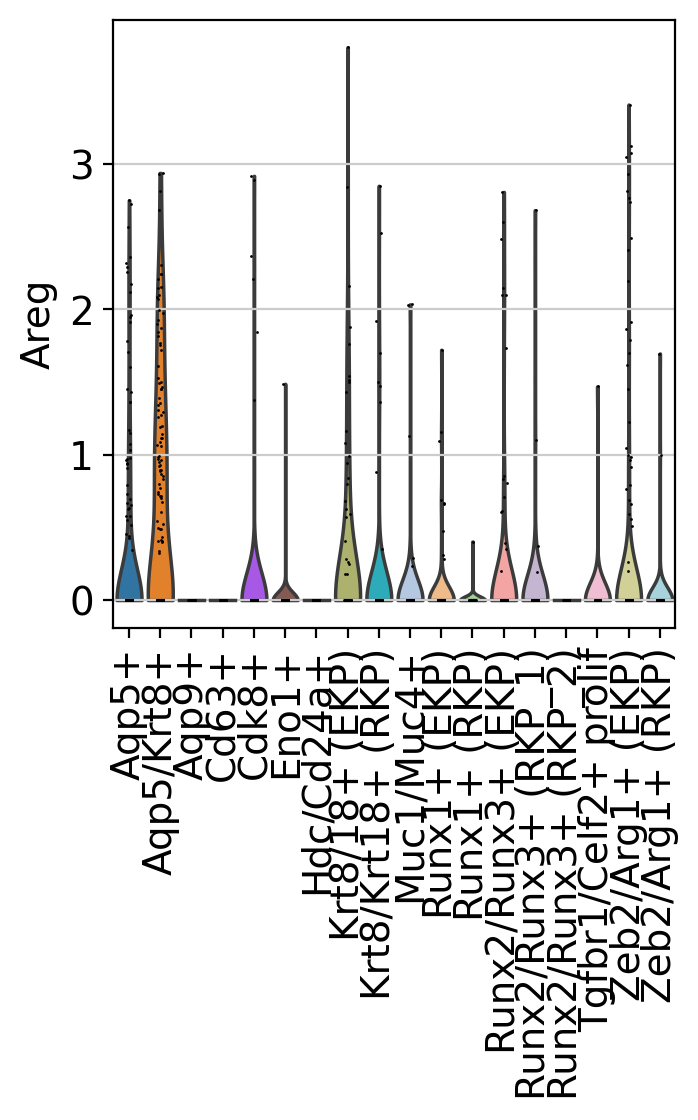

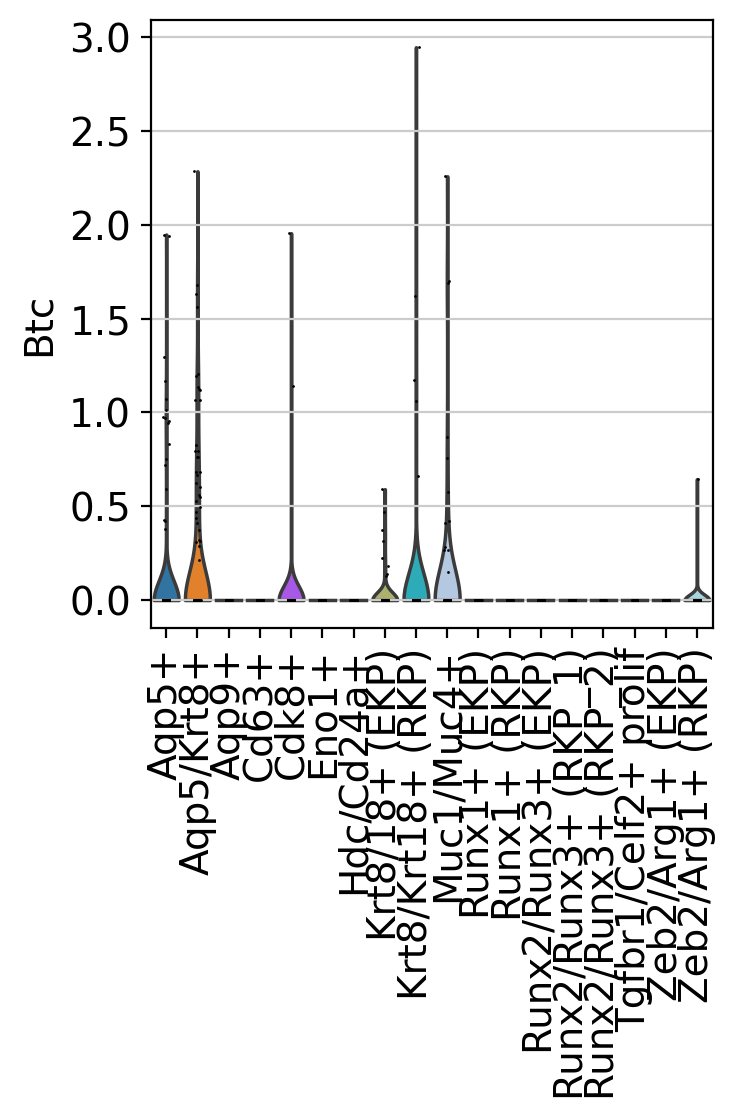

In [140]:
sc.pl.dotplot(adata, ['Tgfa','Btc',#'Hbegf',
                      'Epgn','Ereg','Egf','Areg'], groupby='type',vmin=0,vmax=0.2, save='_EGF_ligands_by_type.pdf')
sc.pl.violin(adata, ['Areg'], groupby='celltype', rotation=90)#, save='_Areg_by_celltype')
sc.pl.violin(adata, ['Btc'], groupby='celltype', rotation=90, save='_Btc_by_celltype.pdf')

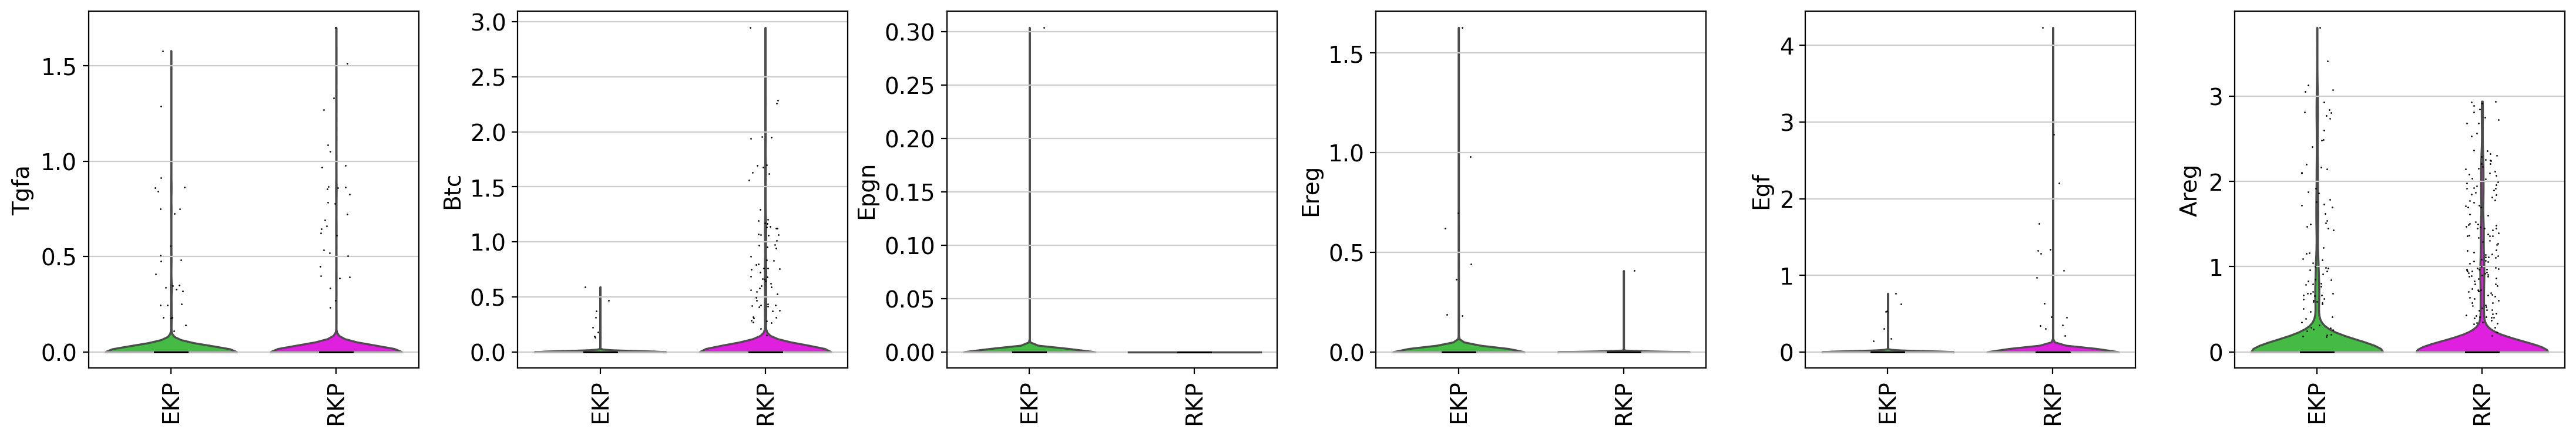

In [47]:
sc.pl.violin(adata, ['Tgfa','Btc',#'Hbegf',
                      'Epgn','Ereg','Egf','Areg'], groupby='type', rotation=90)#, save='_Areg_by_celltype')

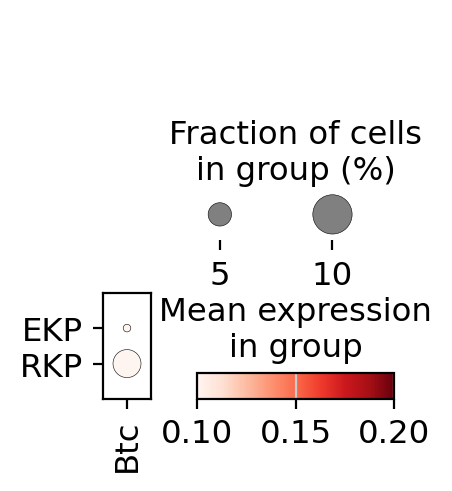

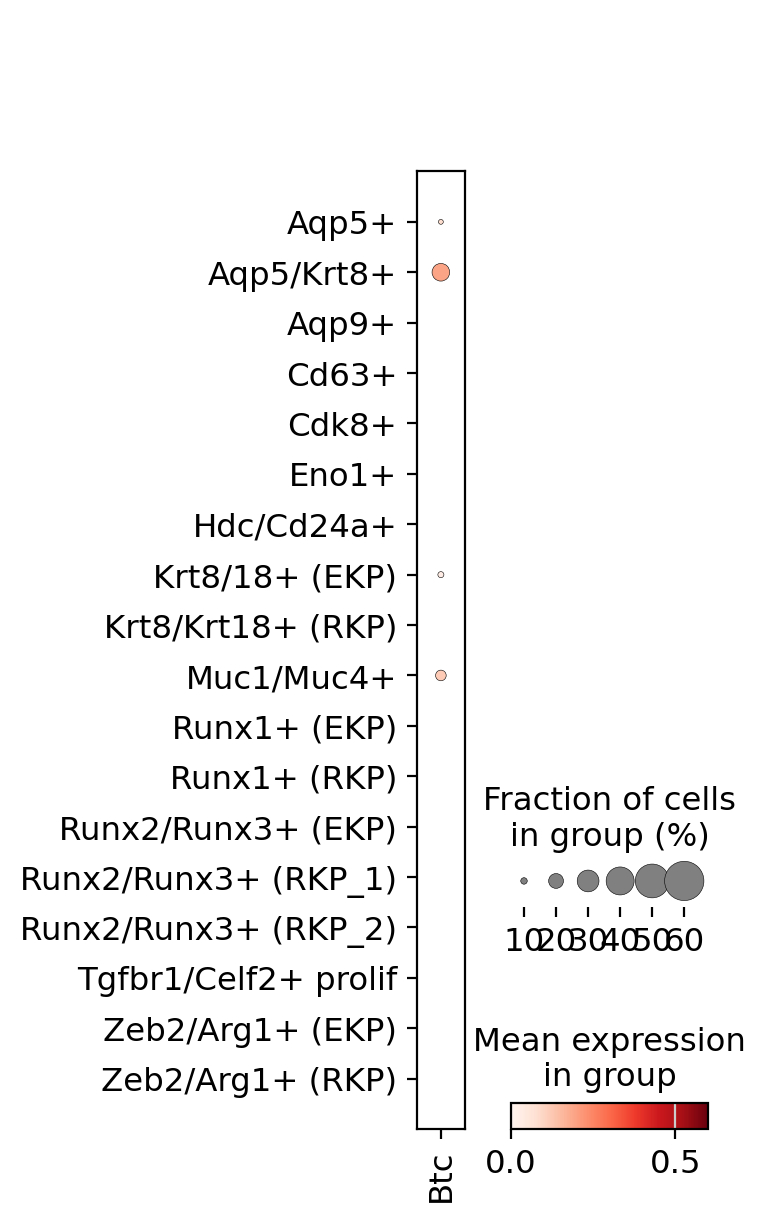

In [149]:
sc.pl.dotplot(adata, ['Btc'], groupby='type', vmin=0.1, vmax=0.2, save='_Btc_by_celltype.pdf')
sc.pl.dotplot(adata, ['Btc'], groupby='celltype', dot_min=0.05, dot_max=0.6, vmax=0.6, save='_Btc_by_celltype.pdf')

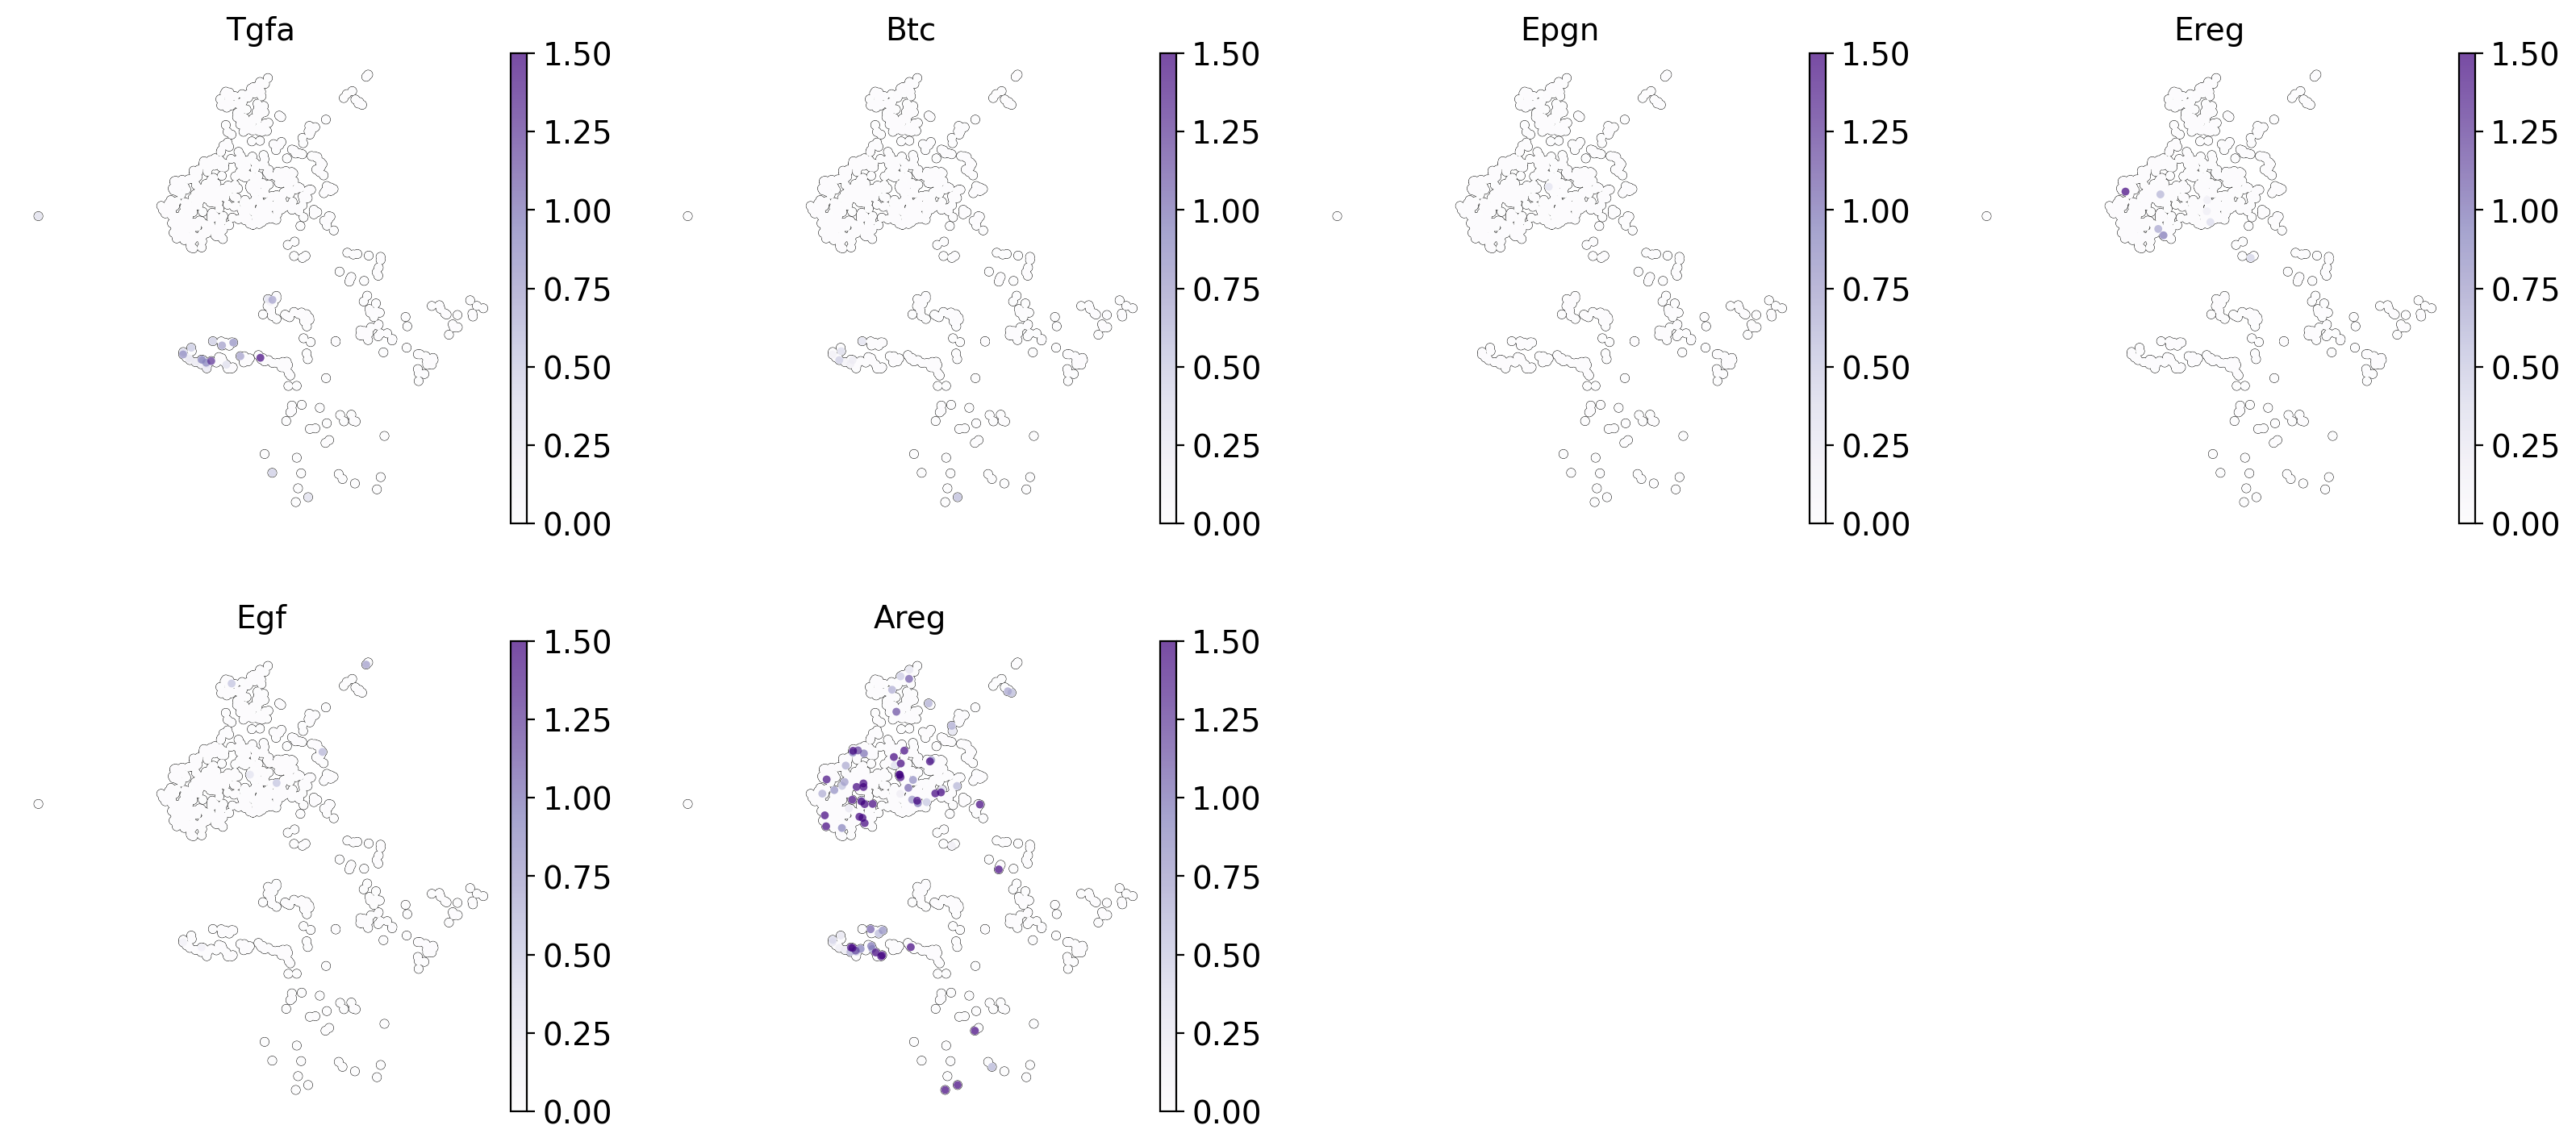

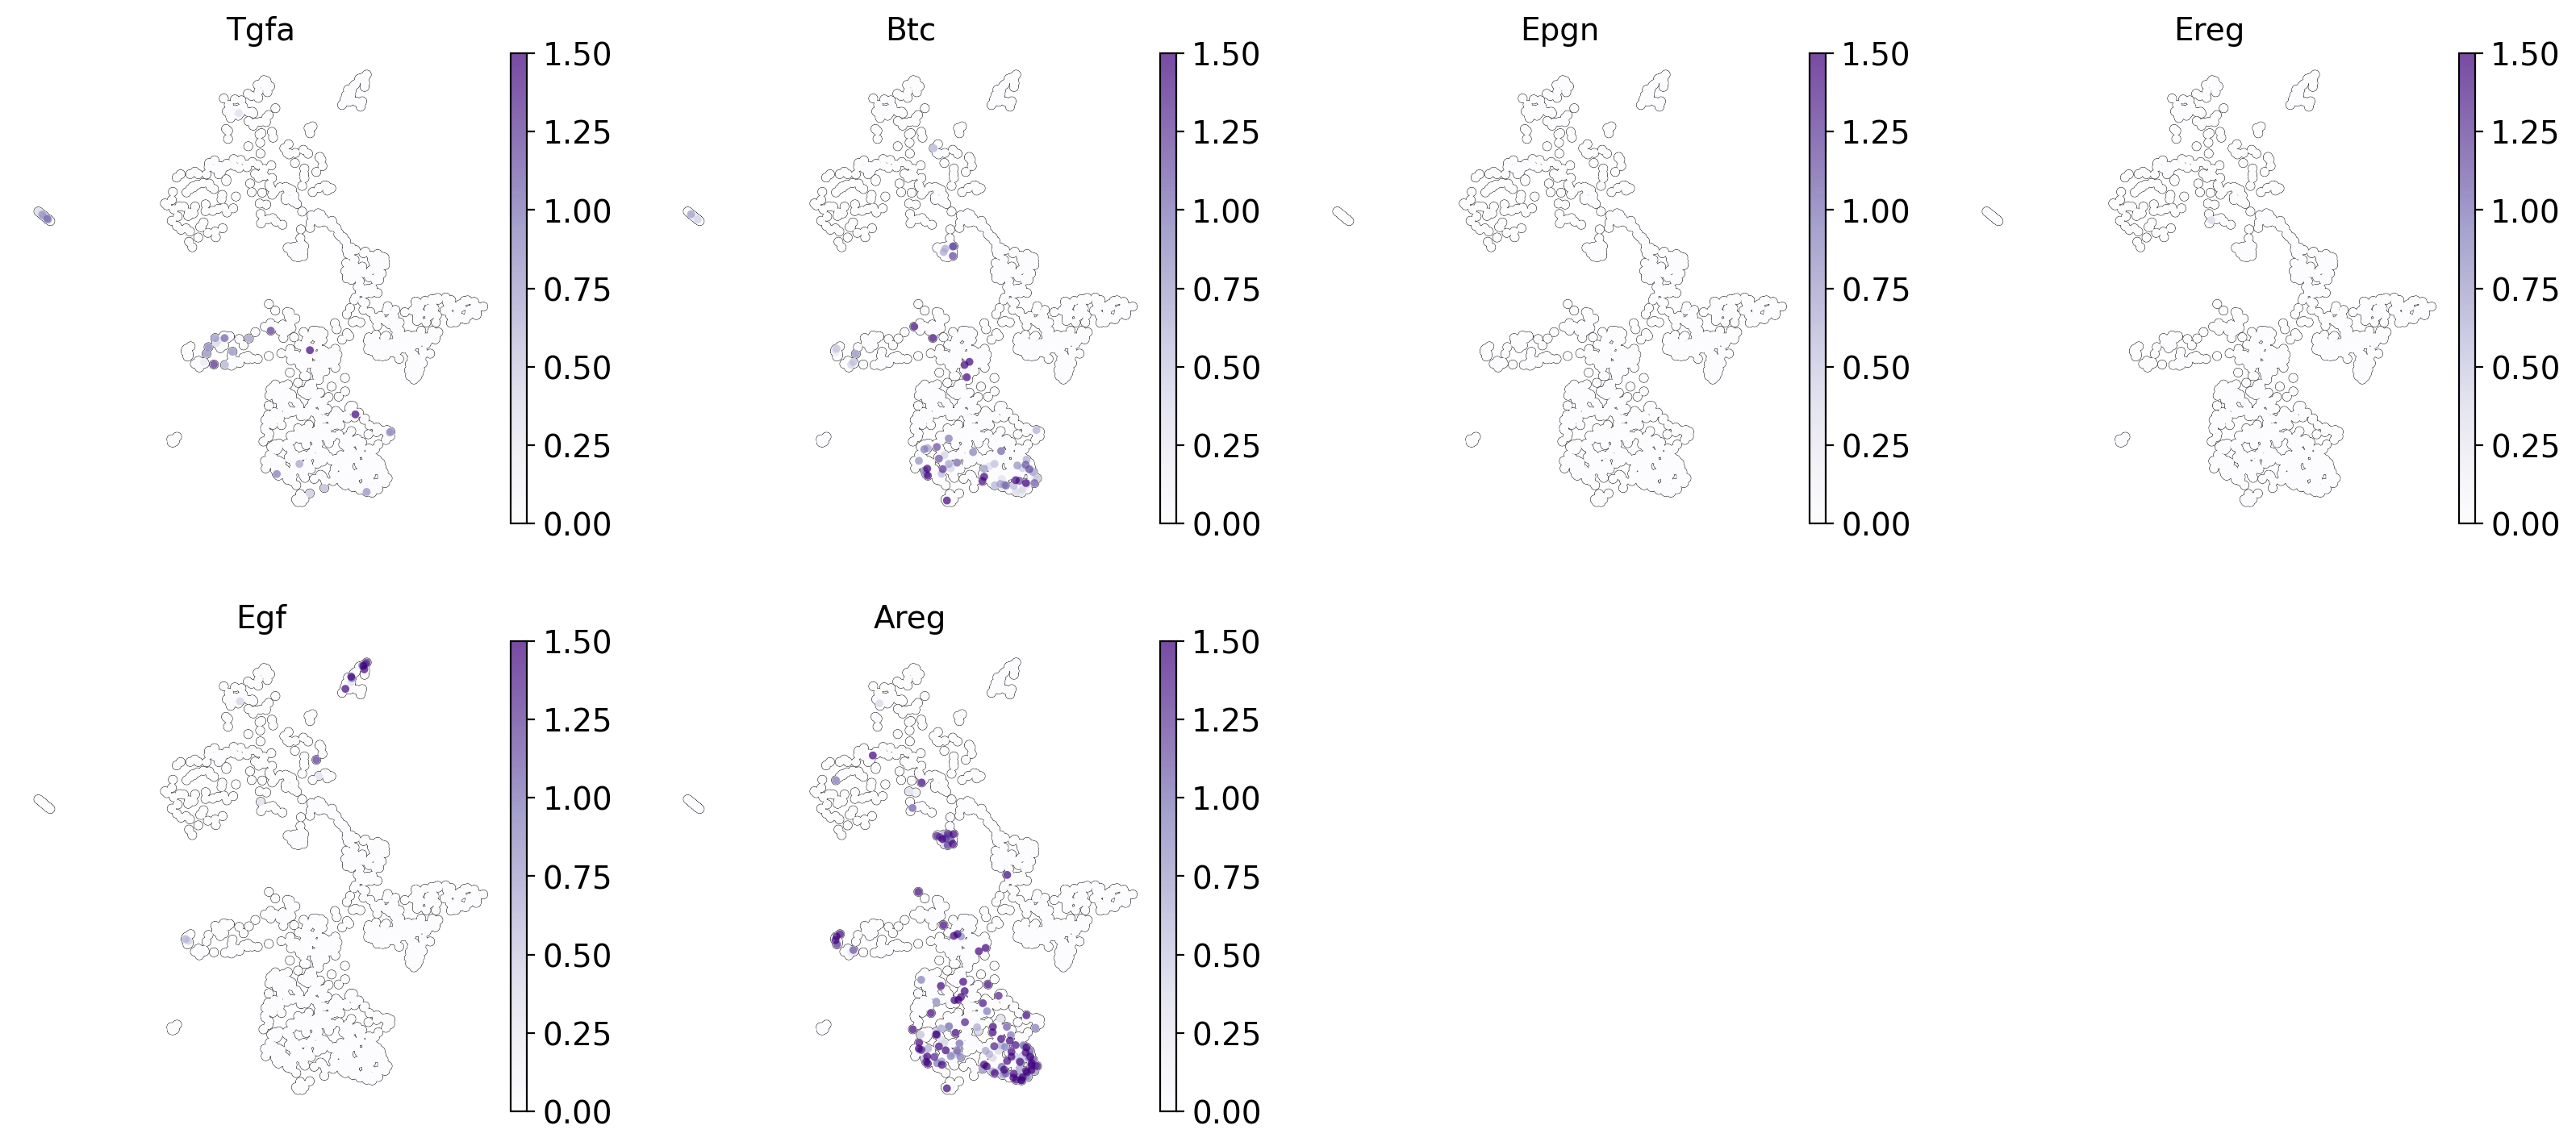

In [118]:
sc.pl.umap(adata[adata.obs['type']=='EKP'], color=['Tgfa','Btc',#'Hbegf',
                      'Epgn','Ereg','Egf','Areg'], legend_loc='right margin', frameon=False, add_outline=True, outline_width=(0.05,0.05),vmin=0, vmax=[1.5], size=50, cmap='Purples', save='_EGF_ligands_in_EKP.pdf')
sc.pl.umap(adata[adata.obs['type']=='RKP'], color=['Tgfa','Btc',#'Hbegf',
                      'Epgn','Ereg','Egf','Areg'], legend_loc='right margin', frameon=False, add_outline=True, outline_width=(0.05,0.05),vmin=0, vmax=[1.5], size=50, cmap='Purples', save='_EGF_ligands_in_RKP.pdf')

In [48]:
sc.tl.rank_genes_groups(adata, 'type', method='t-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [49]:
result_type = adata.uns['rank_genes_groups']
groups_type = result_type['names'].dtype.names
pval_table_type = pd.DataFrame(
            {group + '_' + key[:2]: result_type[key][group]
            for group in groups_type for key in ['names', 'pvals_adj']})
pval_table_type

EKP_na         EKP_pv    RKP_na         RKP_pv
0        Malat1  1.547461e-148     Cmss1  2.140906e-291
1          Gnaq  2.432271e-138      Gphn  1.776165e-248
2         Spag9  3.631193e-116   Gm42418  2.617366e-207
3          Gab2  8.280278e-117  AY036118  2.383742e-162
4          Ext1  1.339903e-113   Gm19951  3.647113e-160
...         ...            ...       ...            ...
20465   Gm19951  3.647113e-160      Ext1  1.339903e-113
20466  AY036118  2.383742e-162      Gab2  8.280278e-117
20467   Gm42418  2.617366e-207     Spag9  3.631193e-116
20468      Gphn  1.776165e-248      Gnaq  2.432271e-138
20469     Cmss1  2.140906e-291    Malat1  1.547461e-148

[20470 rows x 4 columns]

In [50]:
pval_table_type.loc[pval_table_type['RKP_na'].isin(['Areg','Btc'])]

EKP_na        EKP_pv RKP_na        RKP_pv
322   Atp9b  3.034507e-48    Btc  1.077280e-10
3847  Top2b  2.371552e-05   Areg  4.181519e-01

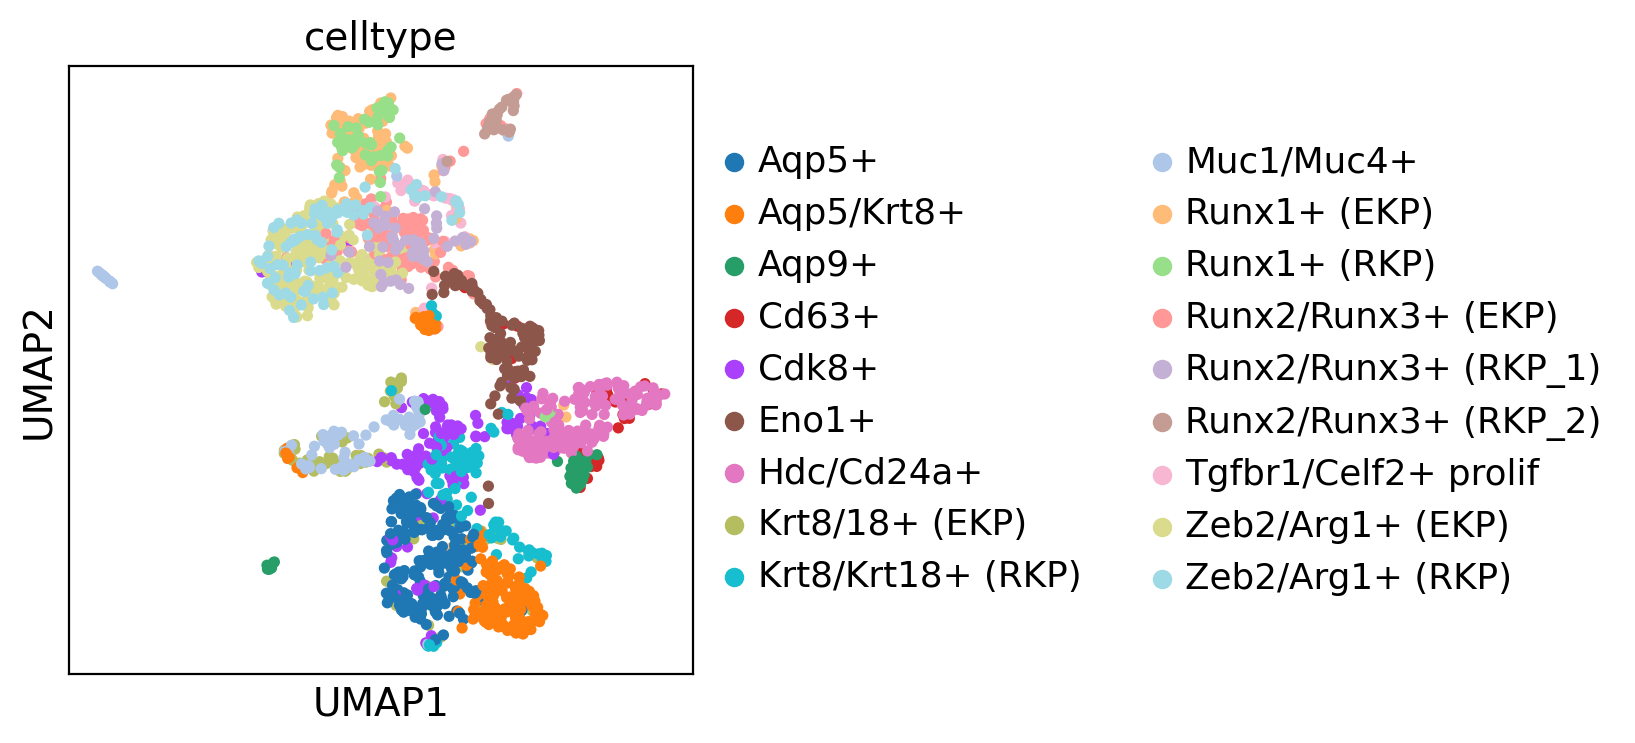

In [21]:
sc.pl.umap(adata, color=['celltype'])

In [51]:
sc.tl.rank_genes_groups(adata, 'celltype', method='t-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [52]:
result_ekprkp = adata.uns['rank_genes_groups']
groups_ekprkp = result_ekprkp['names'].dtype.names
pval_table_ekprkp = pd.DataFrame(
            {group + '_' + key[:2]: result_ekprkp[key][group]
            for group in groups_ekprkp for key in ['names', 'pvals_adj']})
pval_table_ekprkp

Aqp5+_na       Aqp5+_pv Aqp5/Krt8+_na  Aqp5/Krt8+_pv Aqp9+_na  \
0       S100a6  3.920268e-226        Lgals1  1.104819e-161     Pim1   
1       Lgals1  2.615772e-145        S100a6  4.225041e-219     Junb   
2        Rpl13  2.073614e-158         Rhox5  6.378039e-101     Ccl6   
3        Rplp1  6.874182e-149       Slc25a4   7.156345e-93    Zfp36   
4         Rpl5  2.840554e-142           Ran   1.120337e-90     Srgn   
...        ...            ...           ...            ...      ...   
20465     Lcp1  1.718454e-190          Pim1  1.494972e-243     Ctss   
20466   Fcer1g  1.838171e-207          Srgn  9.641379e-204  Fam162a   
20467     Btg1  2.013453e-191          Lcp1  5.713496e-264     Nme2   
20468     Cyba  1.049560e-233        Tyrobp  1.305793e-267   Atpif1   
20469     Ctss  9.138444e-243        Fcer1g  7.540274e-276      App   

            Aqp9+_pv  Cd63+_na       Cd63+_pv Cdk8+_na       Cdk8+_pv  ...  \
0       2.743652e-14      Fth1   6.733472e-10     Cdk8   2.609159e-07  ...   
1       7.557589e-14     Cebpb   8.159996e-07  Gm19951   2.774679e-05  ...   
2       7.188228e-14     Basp1   1.006519e-06  Gm26917   2.939257e-05  ...   
3       2.367540e-12      Srgn   1.245336e-06  Gm42418   2.828244e-04  ...   
4       3.024154e-11     Il1rn   3.239937e-06    Lars2   1.313707e-03  ...   
...              ...       ...            ...      ...            ...  ...   
20465  3.597953e-235     Klhl2  4.473176e-166    Sidt2   6.919814e-93  ...   
20466  2.454708e-240     Celf1  3.745211e-177    Blvrb  1.817496e-102  ...   
20467   7.315150e-86       Lpp  1.510380e-104    Rab8a  1.208908e-116  ...   
20468  1.285715e-291      Smg1  2.849939e-186  Dynlrb1   2.231797e-89  ...   
20469  4.561773e-303  Ppp1r12a  1.541786e-190    Stx12  6.412927e-124  ...   

      Runx2/Runx3+ (RKP_1)_na  Runx2/Runx3+ (RKP_1)_pv  \
0                        Ctss             1.782512e-40   
1                        Cd74             6.308739e-30   
2                        Cyba             2.556502e-31   
3                       Ifi30             5.312843e-26   
4                        Lcp1             9.149726e-31   
...                       ...                      ...   
20465                     Clu             2.842898e-73   
20466                   Cald1             2.779705e-83   
20467                     Cpe             2.622674e-89   
20468                  Cdkn2a             2.543343e-85   
20469                   Nedd4             1.165908e-90   

      Runx2/Runx3+ (RKP_2)_na  Runx2/Runx3+ (RKP_2)_pv  \
0                        Jak2             8.518499e-19   
1                    Rabgap1l             1.467505e-17   
2                     Ankrd44             3.717284e-18   
3                     Map3k14             1.587180e-17   
4                       Birc2             5.415127e-17   
...                       ...                      ...   
20465                   Cebpb             2.702671e-37   
20466                    Tlr4            1.873082e-127   
20467                     F10            1.419520e-130   
20468                    Lyz2            1.864063e-133   
20469                    Arg1            7.236598e-160   

      Tgfbr1/Celf2+ prolif_na  Tgfbr1/Celf2+ prolif_pv Zeb2/Arg1+ (EKP)_na  \
0                        Gnaq             1.346336e-13                Arg1   
1                       Prkcd             8.792192e-13                Zeb2   
2                      Picalm             4.297619e-13                Cd53   
3                         Lyn             1.092620e-12               Plin2   
4                       Trps1             6.294334e-12              Iqgap1   
...                       ...                      ...                 ...   
20465                    Rbp1             3.022021e-93             Gm42418   
20466                     Clu             7.894268e-96            AY036118   
20467                   Nedd4            2.686950e-107             Gm19951   
20468                    Krt8            8

In [53]:
pval_table_ekprkp.loc[pval_table_ekprkp['Aqp5+_na'].isin(['Areg','Btc'])]

Aqp5+_na  Aqp5+_pv Aqp5/Krt8+_na  Aqp5/Krt8+_pv       Aqp9+_na  Aqp9+_pv  \
1004     Areg  0.014743          Uba3   1.886427e-08  2010109A12Rik  0.398738   
1104      Btc  0.037936         Wwtr1   1.618808e-07         Gm8251  0.423693   

     Cd63+_na  Cd63+_pv  Cdk8+_na  Cdk8+_pv  ... Runx2/Runx3+ (RKP_1)_na  \
1004  Zkscan6  0.688177    Pwwp3a  0.558982  ...                   Mknk1   
1104    Myct1  0.732391  AU022252  0.596097  ...                   Safb2   

      Runx2/Runx3+ (RKP_1)_pv Runx2/Runx3+ (RKP_2)_na  \
1004                 0.000197                  Babam1   
1104                 0.000334                  Mtmr14   

      Runx2/Runx3+ (RKP_2)_pv Tgfbr1/Celf2+ prolif_na  \
1004                 0.014147                  Ifngr1   
1104                 0.019984           1810030O07Rik   

      Tgfbr1/Celf2+ prolif_pv Zeb2/Arg1+ (EKP)_na  Zeb2/Arg1+ (EKP)_pv  \
1004                 0.015073               Smim3         1.362142e-16   
1104                 0.021554               Rasa2         2.722202e-15   

     Zeb2/Arg1+ (RKP)_na  Zeb2/Arg1+ (RKP)_pv  
1004                Elf4             0.001161  
1104              Tbxas1             0.002145  

[2 rows x 36 columns]

In [54]:
df = pval_table_ekprkp.loc[:, pval_table_ekprkp.columns.isin(['Aqp5+_na','Aqp5+_pv'])]
df.loc[df['Aqp5+_na'].isin(['Areg','Btc'])]

Aqp5+_na  Aqp5+_pv
1004     Areg  0.014743
1104      Btc  0.037936

In [59]:
adata

AnnData object with n_obs × n_vars = 1832 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'scvelo_leiden', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'type_colors', 'umap', 'celltype_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distanc

In [60]:
adata.write('EKP_and_RKP_velocity_overlaid_08-25-24.h5ad', compression='gzip')

In [22]:
adata= sc.read('EKP_and_RKP_velocity_overlaid_08-25-24.h5ad')
adata

AnnData object with n_obs × n_vars = 1832 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'scvelo_leiden', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distanc

In [23]:
adata.obs['celltype']

AAACCCACAGTATGAA      Zeb2/Arg1+ (EKP)
AAACGAAAGTAGGGTC                 Cd63+
AAACGAATCTCGCTTG                 Cdk8+
AAACGCTAGTGGCGAT    Runx2/Runx3+ (EKP)
AAACGCTCATGGAATA          Runx1+ (EKP)
                           ...        
TTTGATCCATGACTTG                 Eno1+
TTTGGAGGTCTCGCGA                 Eno1+
TTTGGAGTCATGGTAC            Hdc/Cd24a+
TTTGTTGCAACAGCCC                 Cdk8+
TTTGTTGCAGGATTCT     Krt8/Krt18+ (RKP)
Name: celltype, Length: 1832, dtype: category
Categories (18, object): ['Aqp5+', 'Aqp5/Krt8+', 'Aqp9+', 'Cd63+', ..., 'Runx2/Runx3+ (RKP_2)', 'Tgfbr1/Celf2+ prolif', 'Zeb2/Arg1+ (EKP)', 'Zeb2/Arg1+ (RKP)']

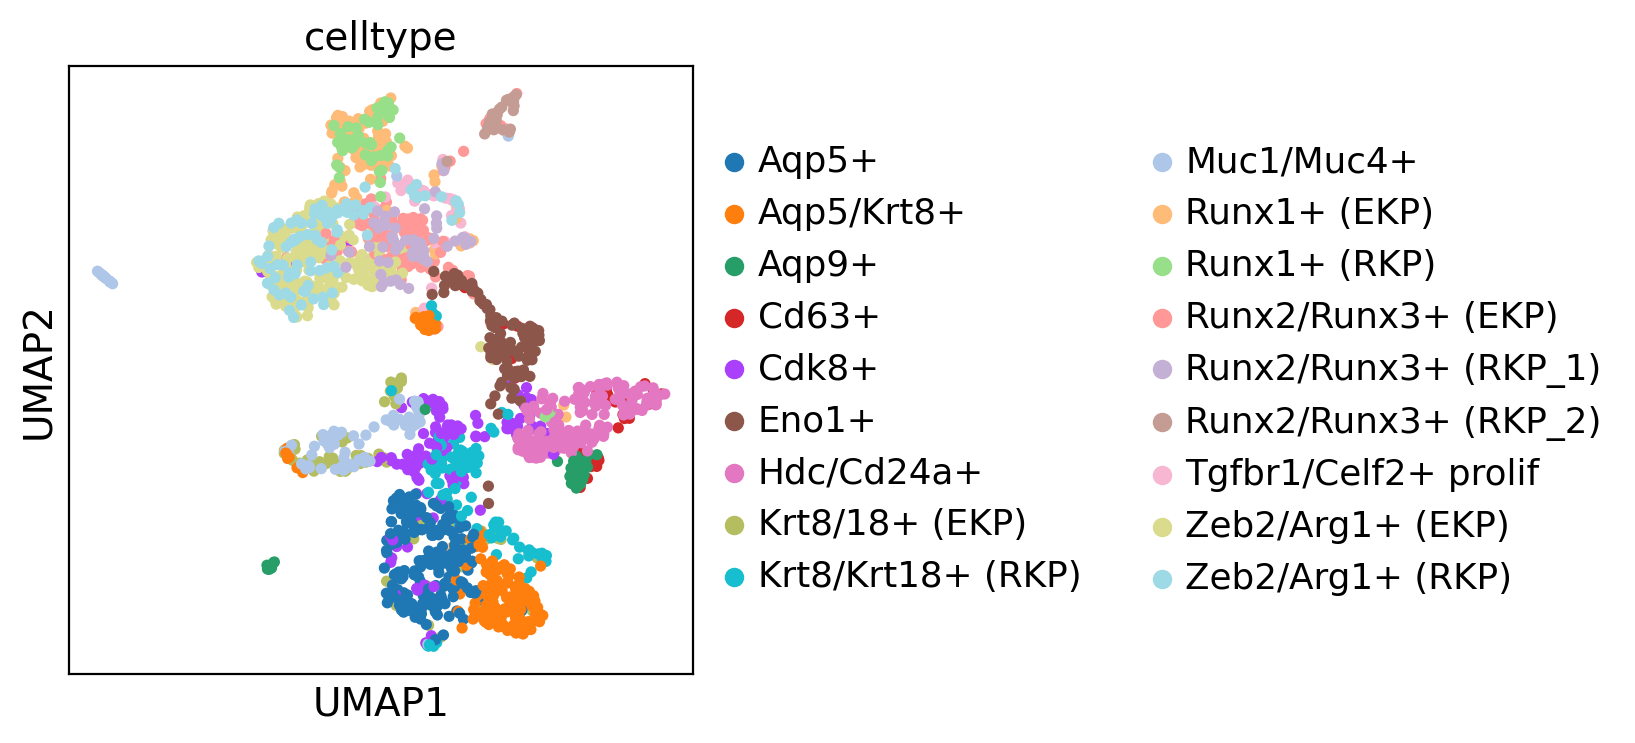

In [24]:
sc.pl.umap(adata, color=['celltype'])

In [114]:
df_counts = pd.DataFrame(adata.raw.X.toarray(), columns=adata.var_names, index=adata.obs_names)

In [116]:
df_counts.to_csv('EKP_RKP_raw_counts.csv')

In [132]:
adata.obs.to_csv('EKP_RKP_metadata.csv')

In [109]:
pd.DataFrame(adata.var_names).to_csv('EKP_RKP_genes.csv')

In [9]:
adata.X

array([[-0.04114349, -0.02336347, -0.0313444 , ..., -0.16671158,
        -0.17400374,  1.573736  ],
       [-0.04114349, -0.02336347, -0.0313444 , ..., -0.16671158,
        -0.17400374, -0.48269928],
       [-0.04114349, -0.02336347, -0.0313444 , ..., -0.16671158,
        -0.17400374, -0.48269928],
       ...,
       [-0.04114349, -0.02336347, -0.0313444 , ..., -0.16671158,
        -0.17400374, -0.48269928],
       [-0.04114349, -0.02336347, -0.0313444 , ..., -0.16671158,
        -0.17400374, -0.48269928],
       [-0.04114349, -0.02336347, -0.0313444 , ..., -0.16671158,
        -0.17400374, -0.48269928]], dtype=float32)

In [10]:
df_counts_normalized = pd.DataFrame(adata.X, columns=adata.var_names, index=adata.obs_names)
df_counts_normalized

Xkr4   Gm19938       Rp1    Sox17   Gm37323    Mrpl15  \
AAACCCACAGTATGAA -0.041143 -0.023363 -0.031344 -0.04783 -0.023363 -0.473827   
AAACGAAAGTAGGGTC -0.041143 -0.023363 -0.031344 -0.04783 -0.023363 -0.473827   
AAACGAATCTCGCTTG -0.041143 -0.023363 -0.031344 -0.04783 -0.023363 -0.473827   
AAACGCTAGTGGCGAT -0.041143 -0.023363 -0.031344 -0.04783 -0.023363 -0.473827   
AAACGCTCATGGAATA -0.041143 -0.023363 -0.031344 -0.04783 -0.023363  0.619053   
...                    ...       ...       ...      ...       ...       ...   
TTTGATCCATGACTTG -0.041143 -0.023363 -0.031344 -0.04783 -0.023363 -0.473827   
TTTGGAGGTCTCGCGA -0.041143 -0.023363 -0.031344 -0.04783 -0.023363 -0.473827   
TTTGGAGTCATGGTAC -0.041143 -0.023363 -0.031344 -0.04783 -0.023363 -0.473827   
TTTGTTGCAACAGCCC -0.041143 -0.023363 -0.031344 -0.04783 -0.023363 -0.473827   
TTTGTTGCAGGATTCT -0.041143 -0.023363 -0.031344 -0.04783 -0.023363 -0.473827   

                    Lypla1     Tcea1     Rgs20   Atp6v1h  ...  AC168977.2  \
AAACCCACAGTATGAA  0.751747 -0.764696 -0.036839  0.970333  ...   -0.032487   
AAACGAAAGTAGGGTC -0.483928 -0.764696 -0.036839 -0.613629  ...   -0.032487   
AAACGAATCTCGCTTG -0.483928 -0.764696 -0.036839 -0.613629  ...   -0.032487   
AAACGCTAGTGGCGAT  0.325243  0.447048 -0.036839  1.447540  ...   -0.032487   
AAACGCTCATGGAATA -0.483928 -0.764696 -0.036839  0.148329  ...   -0.032487   
...                    ...       ...       ...       ...  ...         ...   
TTTGATCCATGACTTG -0.483928 -0.764696 -0.036839 -0.613629  ...   -0.032487   
TTTGGAGGTCTCGCGA -0.483928 -0.764696 -0.036839 -0.613629  ...   -0.032487   
TTTGGAGTCATGGTAC -0.483928 -0.764696 -0.036839 -0.613629  ...   -0.032487   
TTTGTTGCAACAGCCC -0.483928 -0.764696 -0.036839 -0.613629  ...   -0.032487   
TTTGTTGCAGGATTCT -0.483928 -0.764696 -0.036839  5.244908  ...   -0.032487   

                  AC168977.1  CAAA01118383.1  AC132444.5     Csprs     Vamp7  \
AAACCCACAGTATGAA   -0.071682        3.358557   -0.078832 -0.068927 -0.421342   
AAACGAAAGTAGGGTC   -0.071682       -0.437904   -0.078832 -0.068927 -0.421342   
AAACGAATCTCGCTTG   -0.071682       -0.437904   -0.078832 -0.068927 -0.421342   
AAACGCTAGTGGCGAT   -0.071682       -0.437904   -0.078832 -0.068927  0.577040   
AAACGCTCATGGAATA   -0.071682       -0.437904   -0.078832 -0.068927 -0.421342   
...                      ...             ...         ...       ...       ...   
TTTGATCCATGACTTG   -0.071682       -0.437904   -0.078832 -0.068927 -0.421342   
TTTGGAGGTCTCGCGA   -0.071682       -0.437904   -0.078832 -0.068927 -0.421342   
TTTGGAGTCATGGTAC   -0.071682       -0.437904   -0.078832 -0.068927 -0.421342   
TTTGTTGCAACAGCCC   -0.071682       -0.437904   -0.078832 -0.068927 -0.421342   
TTTGTTGCAGGATTCT   10.000000       -0.437904   -0.078832 -0.068927 -0.421342   

                  Spry3     Tmlhe  CAAA01147332.1  AC149090.1  
AAACCCACAGTATGAA    0.0 -0.166712       -0.174004    1.573736  
AAACGAAAGTAGGGTC    0.0 -0.166712       -0.174004   -0.482699  
AAACGAATCTCGCTTG    0.0 -0.166712       -0.174004   -0.482699  
AAACGCTAGTGGCGAT    0.0 -0.166712       -0.174004    0.136005  
AAACGCTCATGGAATA    0.0 -0.166712       -0.174004   -0.482699  
...                 ...       ...             ...         ...  
TTTGATCCATGACTTG    0.0 -0.166712       -0.174004    3.523584  
TTTGGAGGTCTCGCGA    0.0 -0.166712       -0.174004   -0.482699  
TTTGGAGTCATGGTAC    0.0 -0.166712       -0.174004   -0.482699  
TTTGTTGCAACAGCCC    0.0 -0.166712       -0.174004   -0.482699  
TTTGTTGCAGGATTCT    0.0 -0.166712       -0.174004   -0.482699  

[1832 rows x 20470 columns]

In [11]:
df_counts_normalized.to_csv('EKP_RKP_normalized_counts.csv')